# Sommaire :


### <a href="#C1"> **Partie 1 : Contexte et Objectifs**</a>

 - Contexte
 - Objectifs

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> 2.1 Import des packages</a>
 - <a href="#C22"> 2.2 Repertoire de travail</a>
 - <a href="#C24"> 2.3 Import des datas frames</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Data preparation**</a>
 - <a href="#C31"> 3.1 Gestion des outliers</a>
  - <a href="#C311"> 3.1.1 Boxplots</a>
  - <a href="#C312"> 3.1.2 Suppression des outliers</a>
    - <a href="#C3121"> 3.1.2.1 LocalOutlierFactor</a>
    - <a href="#C3122"> 3.1.2.2 Ecart InterQuartile</a>
 - <a href="#C32"> 3.2 Graphiques</a>
 - <a href="#C33"> 3.3 Transformation des variables</a>
 - <a href="#C34"> 3.4 Create X & y</a>
 - <a href="#C35"> 3.5 Train Test Split</a>
 - <a href="#C36"> 3.6 Label Encoder </a>
 - <a href="#C37"> 3.7 Feature Scaling </a>
    
<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Modélisation**</a>
 - <a href="#C41"> 4.1 Dummy Estimator </a>
 - <a href="#C42"> 4.2 Model type </a>
 - <a href="#C43"> 4.3 Feature Selection </a>
 - <a href="#C44"> 4.4 Model Selection </a>
 - <a href="#C45"> 4.5 Fit best Model and get test score </a>
 - <a href="#C46"> 4.6 Save Model </a>
 
<b><hr></b>

### <a href="#C5"> **Partie 5 : Benchmark**</a>


</br>

</br>

</br>

</br>

# <a name="C1">**Partie 1 : Contexte et Objectifs**</a> 

Contexte 

Objectifs

<hr>

</br>

# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [1]:
# Built-in
import os,warnings

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

#Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer

# feature selection
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import entropy

# metrics
import sklearn as sk
from sklearn.metrics import auc,roc_curve,confusion_matrix

# Imputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Modele Selection
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV

# Model
from sklearn import dummy
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


###### <b><font color='blue'>2.1.2 Options</font></b>

In [2]:
#warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='once')

In [3]:
# option de cellule des pandas dataset
pd.set_option("display.max_rows", 200) #parametre le nombre de ligne affichable dans dataframe pandas
pd.set_option("expand_frame_repr", True) #permet de deplier les colonnes cachées
pd.set_option("display.max_columns",200 ) #permet d'afficher jusqu'à 200 colonnes dans une cellule

In [4]:
pd.set_option('max_colwidth', None)

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [5]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '00_EDA P4.ipynb',
 '02_modelisation_consommation totale d’énergie.ipynb',
 '02_modelisation_emission_de_CO2.ipynb',
 '2016_Building_Energy_Benchmarking.csv',
 'Brouillon.ipynb',
 'Bullitt Center.png',
 'data',
 'ModeleCO2.ipynb',
 'rapport.html',
 'README.md']

In [6]:
os.listdir('data/cleaned')

['df_cleaned.csv', 'df_cleaned_AllUse.csv', 'df_cleaned_imputer_encod.csv']

In [7]:
path = 'data/cleaned/'
# A completer
filename = "df_cleaned.csv"

### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [8]:
# df_encod = pd.read_csv(path+'df_cleaned.csv',sep=';',index_col='OSEBuildingID')

df = pd.read_csv(path+filename,sep=';',index_col='OSEBuildingID')
#df['ZipCode'] = df.ZipCode.apply(int).apply(str)
df.head()

,BuildingType,PrimaryPropertyType,ZipCode,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,Age
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,98101,downtown,hotel,hotel,void,void,47.61220,-122.33799,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0,60.0,7456910.0,249.98,89.0
2,NonResidential,Hotel,98101,downtown,"hotel, parking, restaurant",hotel,parking,restaurant,47.61317,-122.33393,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,61.0,8664479.0,295.86,20.0
3,NonResidential,Hotel,98101,downtown,hotel,hotel,void,void,47.61393,-122.33810,1.0,41.0,956110.0,196718.0,759392.0,756493.0,0.0,0.0,43.0,73937112.0,2089.28,47.0
5,NonResidential,Hotel,98101,downtown,hotel,hotel,void,void,47.61412,-122.33664,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0,56.0,6946800.5,286.43,90.0
8,NonResidential,Hotel,98121,downtown,"hotel, parking, swimming pool",hotel,parking,swimming pool,47.61375,-122.34047,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0,75.0,14656503.0,505.01,36.0


In [9]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Age'],
      dtype='object')

In [10]:
df.shape

(3196, 22)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3196 entries, 1 to 50226
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     3196 non-null   object 
 1   PrimaryPropertyType              3196 non-null   object 
 2   ZipCode                          3196 non-null   object 
 3   Neighborhood                     3196 non-null   object 
 4   ListOfAllPropertyUseTypes        3196 non-null   object 
 5   LargestPropertyUseType           3196 non-null   object 
 6   SecondLargestPropertyUseType     3196 non-null   object 
 7   ThirdLargestPropertyUseType      3196 non-null   object 
 8   Latitude                         3196 non-null   float64
 9   Longitude                        3196 non-null   float64
 10  NumberofBuildings                3196 non-null   float64
 11  NumberofFloors                   3196 non-null   float64
 12  PropertyGFATotal   

#### Suppression des lignes dont SiteEnergyUseWN(kBtu) sont NAs

In [12]:
df = df[df['SiteEnergyUseWN(kBtu)'].notna()]

<hr>

</br>

# <a name="C3"><font color='teal'>**Partie 3 : Data preparation**</font></a> 

### <a name="C31"><font color='teal'>3.1 Gestion des outliers</font></a>

#### <a name="C311"><font color='teal'>3.1.1 Boxplots</font></a>

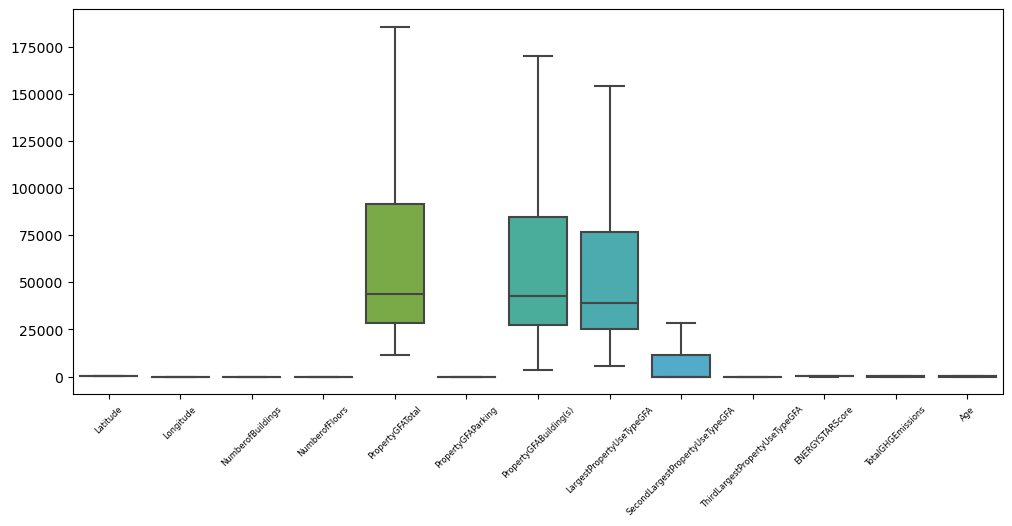

In [13]:
fig = plt.figure(figsize=(12, 5))
sns.boxplot(data = df.drop(columns='SiteEnergyUseWN(kBtu)').select_dtypes(include=[np.number]) ,showfliers = False)
plt.xticks(rotation=45,size = 6);

#### <a name="C312"><font color='teal'>3.1.2 Suppression des outliers</font></a>

##### <a name="C3121"><font color='teal'> 3.1.2.1 LocalOutlierFactor</font></a>

##### <a name="C3122"><font color='teal'> 3.1.2.2 Ecart InterQuartile</font></a>

##### <a name="C3123"><font color='teal'> 3.1.2.3 Algorithmes sklearn</font></a>

### <a name="C32"><font color='teal'> 3.2 Graphiques</font></a>

#### <font color='teal'> 3.2.1 Histogramme</font>

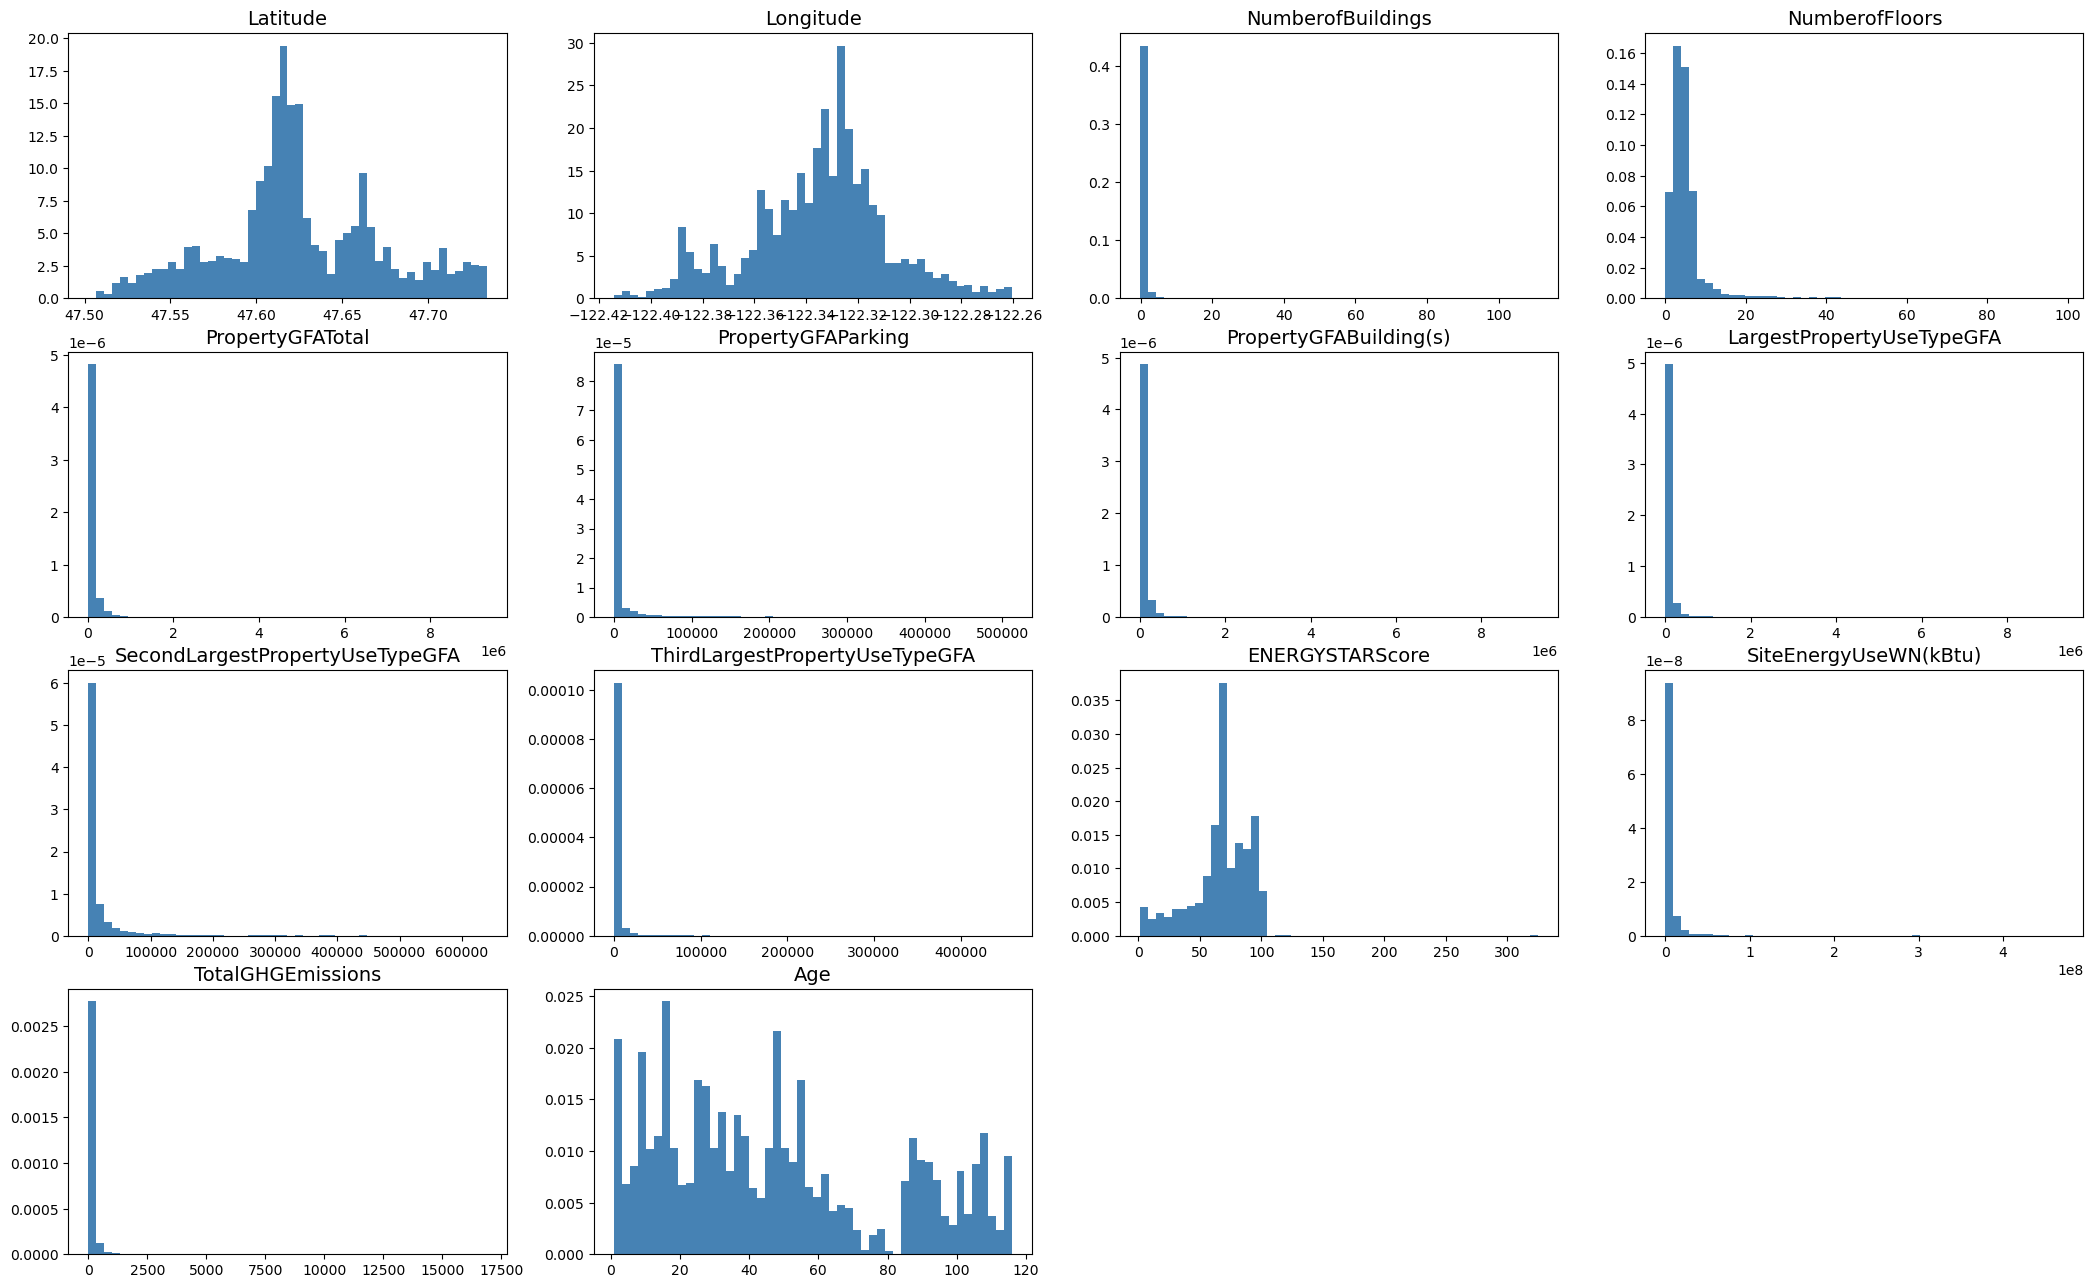

In [14]:
fig = plt.figure(figsize=(26, 20))
X_g = df.select_dtypes(include=np.number)
for feat_idx in range(X_g.shape[1]):
    ax = fig.add_subplot(5,4, (feat_idx+1))
    h = ax.hist(X_g.iloc[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(X_g.columns[feat_idx], fontsize=14)
    
del X_g

#### <font color='teal'> 3.2.2 Pairplot</font>

In [15]:
df.select_dtypes(include=np.number).columns

Index(['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Age'],
      dtype='object')

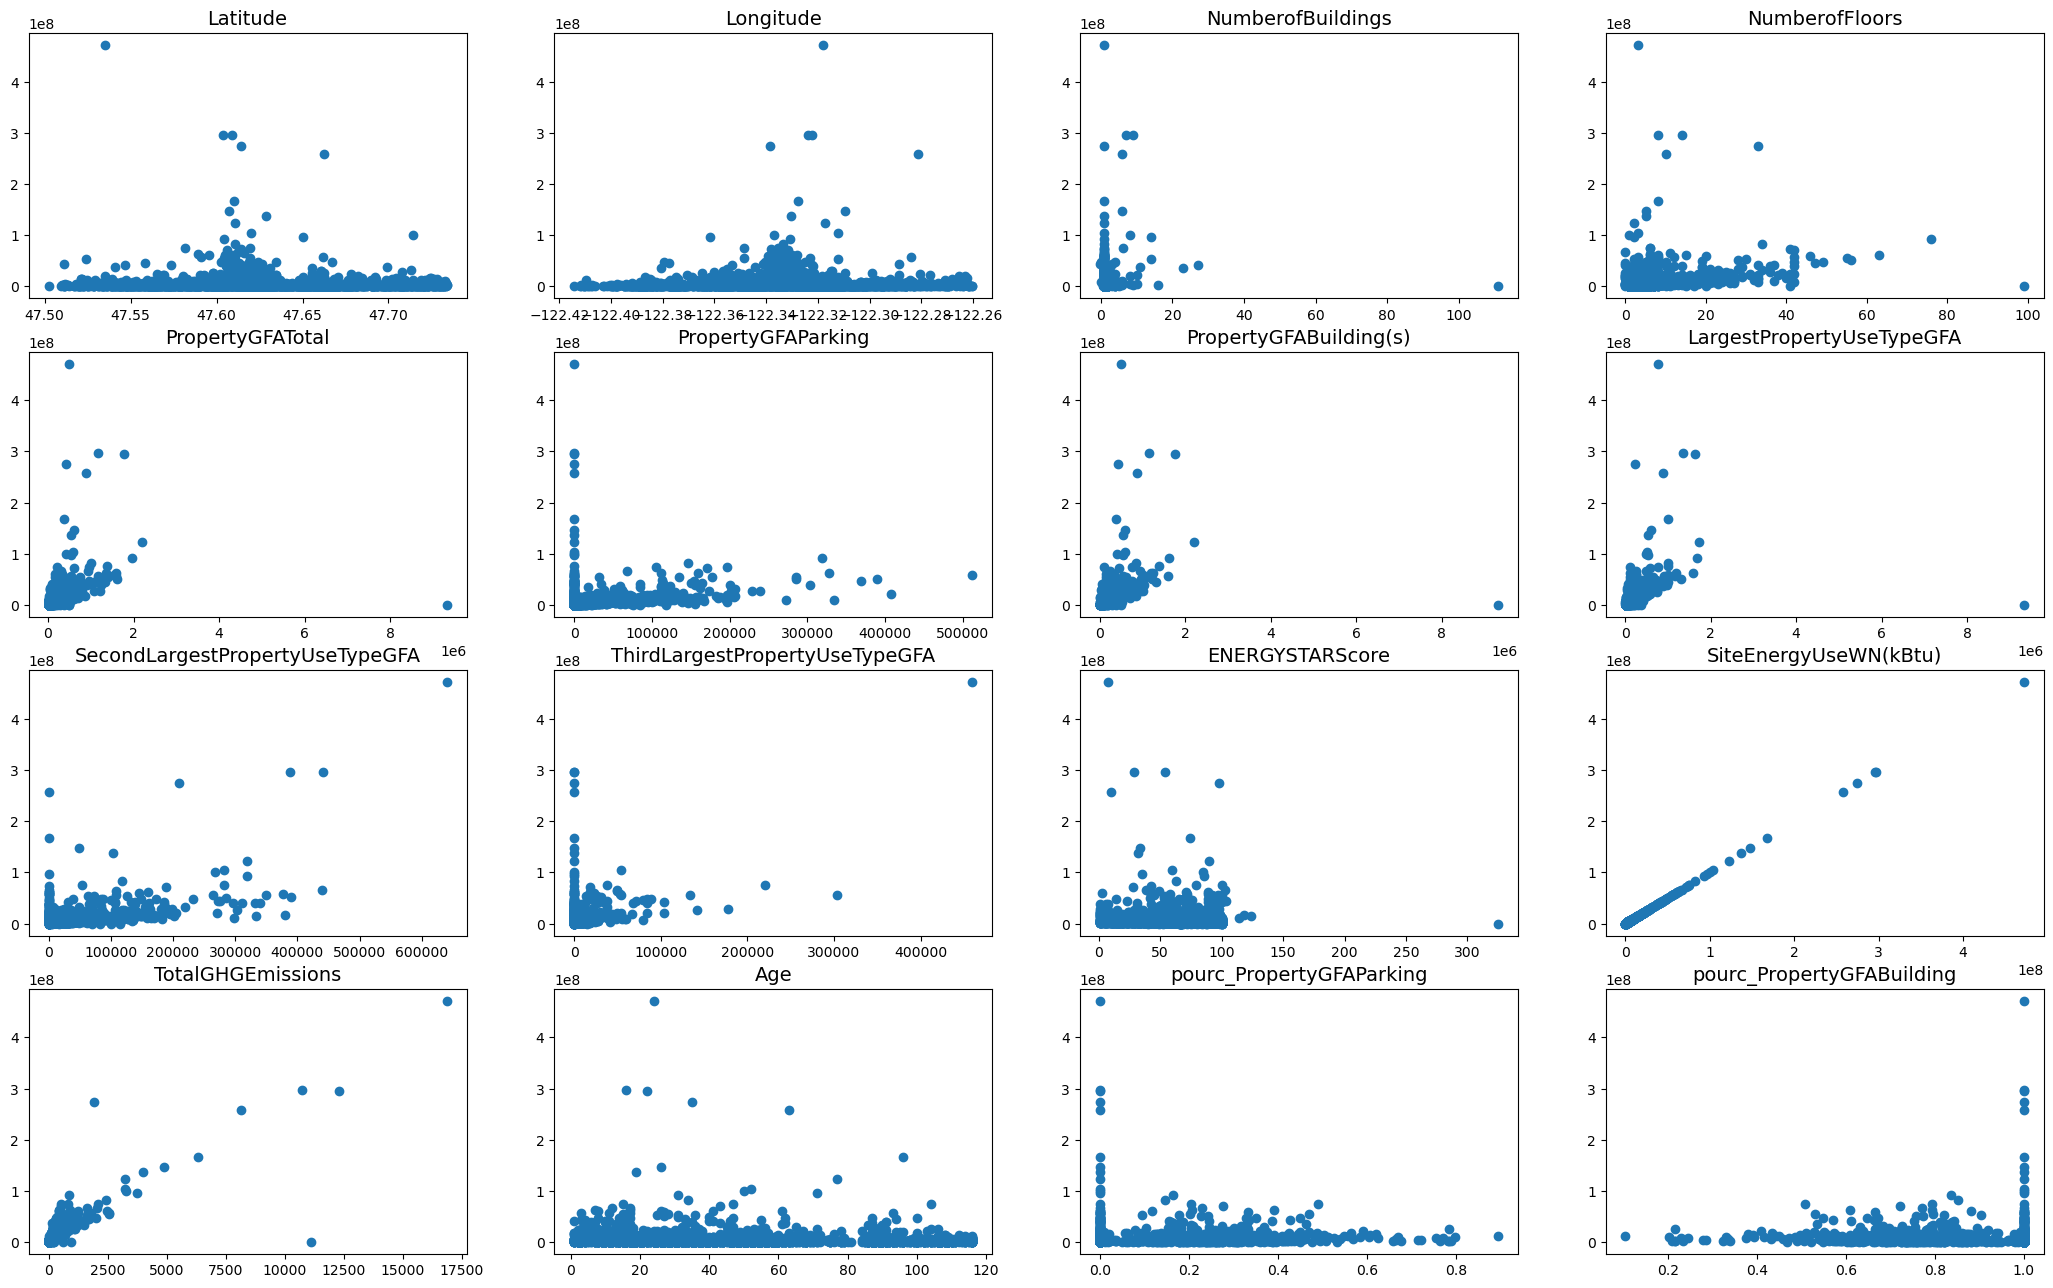

In [16]:
fig = plt.figure(figsize=(26, 20))
X_g = df.select_dtypes(include=np.number)

X_g['pourc_PropertyGFAParking'] = X_g['PropertyGFAParking']/X_g['PropertyGFATotal']
X_g['pourc_PropertyGFABuilding'] = X_g['PropertyGFABuilding(s)']/X_g['PropertyGFATotal']

for feat_idx in range(X_g.shape[1]):
    ax = fig.add_subplot(5,4, (feat_idx+1))
    h = ax.scatter(X_g.iloc[:, feat_idx],X_g['SiteEnergyUseWN(kBtu)'] )
    ax.set_title(X_g.columns[feat_idx], fontsize=14)
    
del X_g

In [17]:
df["NumberofBuildings"].value_counts().sort_index()

-0.305368         1
-0.084506         1
 0.030477         1
 0.598772         1
 0.621803         1
 0.715121         1
 0.776091         1
 0.776786         1
 0.789483         1
 0.809850         1
 0.822821         1
 0.832415         1
 0.836172         1
 0.837701         1
 0.846840         1
 0.858145         1
 0.859299         1
 0.866002         1
 0.866106         1
 0.873761         1
 0.888326         1
 0.890324         1
 0.893496         1
 0.893933         1
 0.910456         1
 0.923291         1
 0.926396         1
 0.939653         1
 0.942838         1
 0.952185         1
 0.953138         1
 0.957390         1
 0.958709         1
 0.960128         1
 0.962489         1
 0.962596         1
 0.967738         1
 0.970841         1
 0.972322         1
 0.972523         1
 0.974955         1
 0.975307         1
 0.977981         1
 0.980915         1
 1.000000      3007
 1.002450         1
 1.003249         1
 1.004728         1
 1.006752         1
 1.009980         1


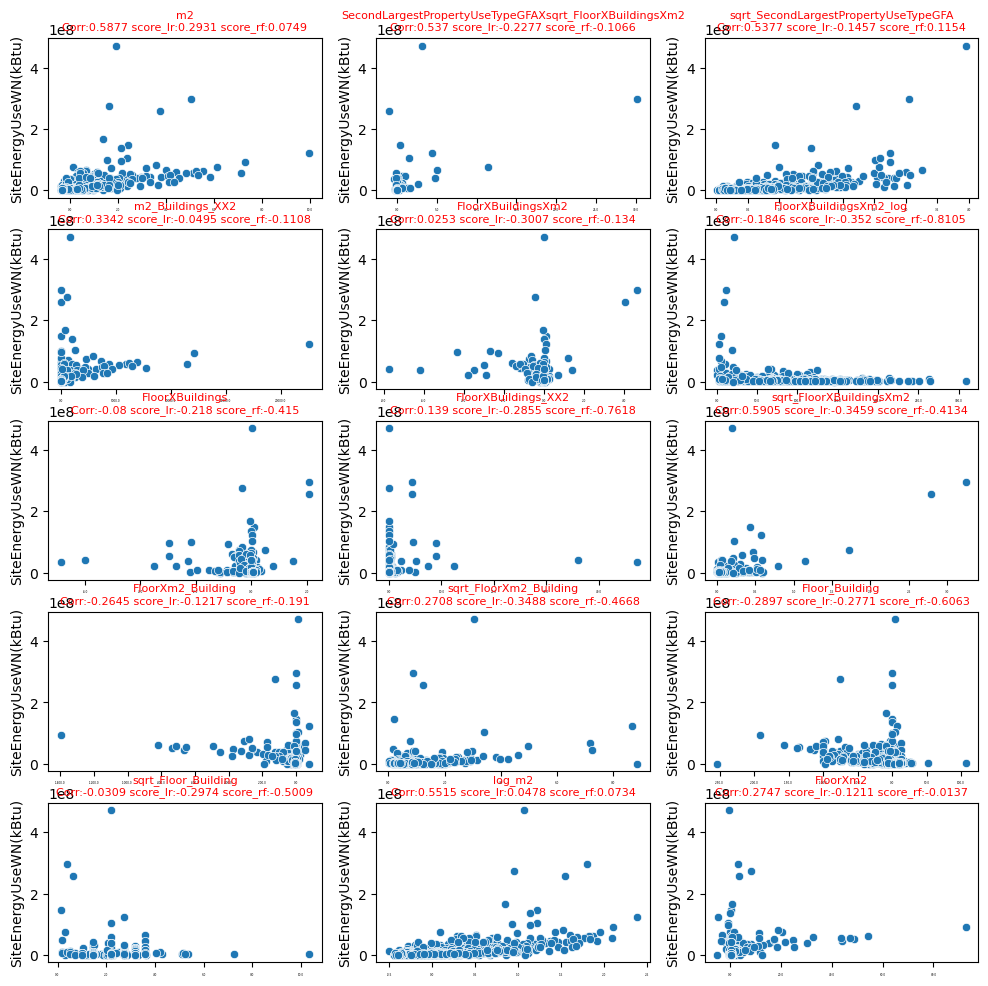

In [18]:
#warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore')

X_a_teste = df[["NumberofBuildings",'NumberofFloors','PropertyGFABuilding(s)','SecondLargestPropertyUseTypeGFA']].copy()

X_a_teste["NumberofBuildings"] = X_a_teste["NumberofBuildings"]+1
X_a_teste["NumberofFloors"] = X_a_teste["NumberofFloors"]+1

    

scaler = StandardScaler()
X_a_teste = scaler.fit_transform(X_a_teste)   

X_a_teste = np.c_[X_a_teste,df['SiteEnergyUseWN(kBtu)']]

cols = scaler.feature_names_in_.tolist()
cols.append('SiteEnergyUseWN(kBtu)')

X_a_teste = pd.DataFrame(X_a_teste,columns=cols)


X_a_teste['m2'] =   ( X_a_teste['PropertyGFABuilding(s)'] )
X_a_teste['SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2'] = X_a_teste["SecondLargestPropertyUseTypeGFA"] * np.sqrt( X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)'] * X_a_teste["NumberofBuildings"])
X_a_teste['sqrt_SecondLargestPropertyUseTypeGFA'] =   np.sqrt( X_a_teste["SecondLargestPropertyUseTypeGFA"] )

X_a_teste['m2_Buildings_XX2'] =   ( X_a_teste['PropertyGFABuilding(s)'] / X_a_teste["NumberofBuildings"] )**2
X_a_teste['FloorXBuildingsXm2'] =  ( X_a_teste['NumberofFloors'] * np.sqrt(X_a_teste['PropertyGFABuilding(s)']) * X_a_teste["NumberofBuildings"])
X_a_teste['FloorXBuildingsXm2_log'] =  np.log2( X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)'] * X_a_teste["NumberofBuildings"])**2

X_a_teste['FloorXBuildings'] =   ( X_a_teste['NumberofFloors'] * X_a_teste["NumberofBuildings"])
X_a_teste['FloorXBuildings_XX2'] =   ( X_a_teste['NumberofFloors'] * X_a_teste["NumberofBuildings"])**2

X_a_teste['sqrt_FloorXBuildingsXm2'] =   np.sqrt( X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)'] * X_a_teste["NumberofBuildings"])

X_a_teste['FloorXm2_Building'] =   ((X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)']/X_a_teste["NumberofBuildings"]))
X_a_teste['sqrt_FloorXm2_Building'] =   np.sqrt((X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)']/X_a_teste["NumberofBuildings"]))

X_a_teste['Floor_Building'] =   (X_a_teste['NumberofFloors'] / X_a_teste['NumberofBuildings'] )
X_a_teste['sqrt_Floor_Building'] =   np.sqrt(X_a_teste['NumberofFloors'] / X_a_teste['NumberofBuildings'] )
X_a_teste['log_m2'] =   np.log1p(X_a_teste['PropertyGFABuilding(s)'] )
X_a_teste['FloorXm2'] =   (X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)'])

X_a_teste = X_a_teste.loc[X_a_teste.FloorXBuildings!=X_a_teste.FloorXBuildings.max()]
X_a_teste = X_a_teste.loc[X_a_teste.FloorXBuildings!=X_a_teste.FloorXBuildings.min()]

fig = plt.figure(figsize=(12, 12))
#X_a_teste = X_a_teste.loc[X_a_teste.FloorXBuildings!=X_a_teste.FloorXBuildings.max()]
for idx,col in enumerate(['m2','SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2','sqrt_SecondLargestPropertyUseTypeGFA',
                          'm2_Buildings_XX2','FloorXBuildingsXm2','FloorXBuildingsXm2_log',
                          'FloorXBuildings','FloorXBuildings_XX2',
                          'sqrt_FloorXBuildingsXm2',
                          'FloorXm2_Building','sqrt_FloorXm2_Building',
                         
                         "Floor_Building","sqrt_Floor_Building","log_m2","FloorXm2"]):
    axes = fig.add_subplot(5,3, (idx+1))
    
    X_data = X_a_teste.copy()
    #X_data = X_data.loc[X_data[col]!=X_data[col].min()]
    #X_data = X_data.loc[X_data[col]!=X_data[col].max()]
    
    lr = LinearRegression()
    rf = RandomForestRegressor(max_depth=5,n_jobs=7)
    correlation = round(X_a_teste[[col,'SiteEnergyUseWN(kBtu)']].corr().iloc[0,1],4)
    score_lr = round(cross_val_score(lr, X_data[[col]].fillna(X_data[[col]].median()),X_data['SiteEnergyUseWN(kBtu)'], cv=5,scoring='r2').mean(),4)
    score_rf = round(cross_val_score(rf, X_data[[col]].fillna(X_data[[col]].median()),X_data['SiteEnergyUseWN(kBtu)'], cv=5,scoring='r2').mean(),4)

    b = sns.scatterplot(data = X_data,x=col,y='SiteEnergyUseWN(kBtu)',ax=axes)
    axes.set_title( col+'\nCorr:' + str(correlation) +' score_lr:'+ str(score_lr)+' score_rf:'+ str(score_rf),size=8,loc='center' ).set_color("red")
    axes.xaxis.set_tick_params(labelsize=7)
    b.set_xticklabels(b.get_xticks(), size = 2)
    axes.set_xlabel('')

del X_a_teste,scaler,cols,fig,idx,col,axes,X_data,lr,rf,correlation,score_lr,score_rf,b

##### creation des nouvelles colonnes

In [19]:
df['sqrt_SecondLargestPropertyUseTypeGFA'] =   np.sqrt( df["SecondLargestPropertyUseTypeGFA"] )
df['sqrt_FloorXBuildingsXm2'] =   np.sqrt( (df["NumberofFloors"]+1) * df['PropertyGFABuilding(s)'] * df["NumberofBuildings"])

# Surface total au sol de chaque Batiment
df['SurfaceSolTotal'] =  (df["NumberofFloors"]+1) * df['PropertyGFABuilding(s)']/df["NumberofBuildings"]

#Nombre d'étage total par batiment
df['NombredEtageTotal'] =  (df["NumberofFloors"]+1) * df["NumberofBuildings"]

# Plus plus
df['SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2'] = df["SecondLargestPropertyUseTypeGFA"] * np.sqrt( (df["NumberofFloors"]+1) * df['PropertyGFABuilding(s)'] * df["NumberofBuildings"])

##### creation la colonne PropertyBuilding_pourc

In [20]:
df['PropertyBuilding_pourc'] = df['PropertyGFABuilding(s)']/df['PropertyGFATotal']

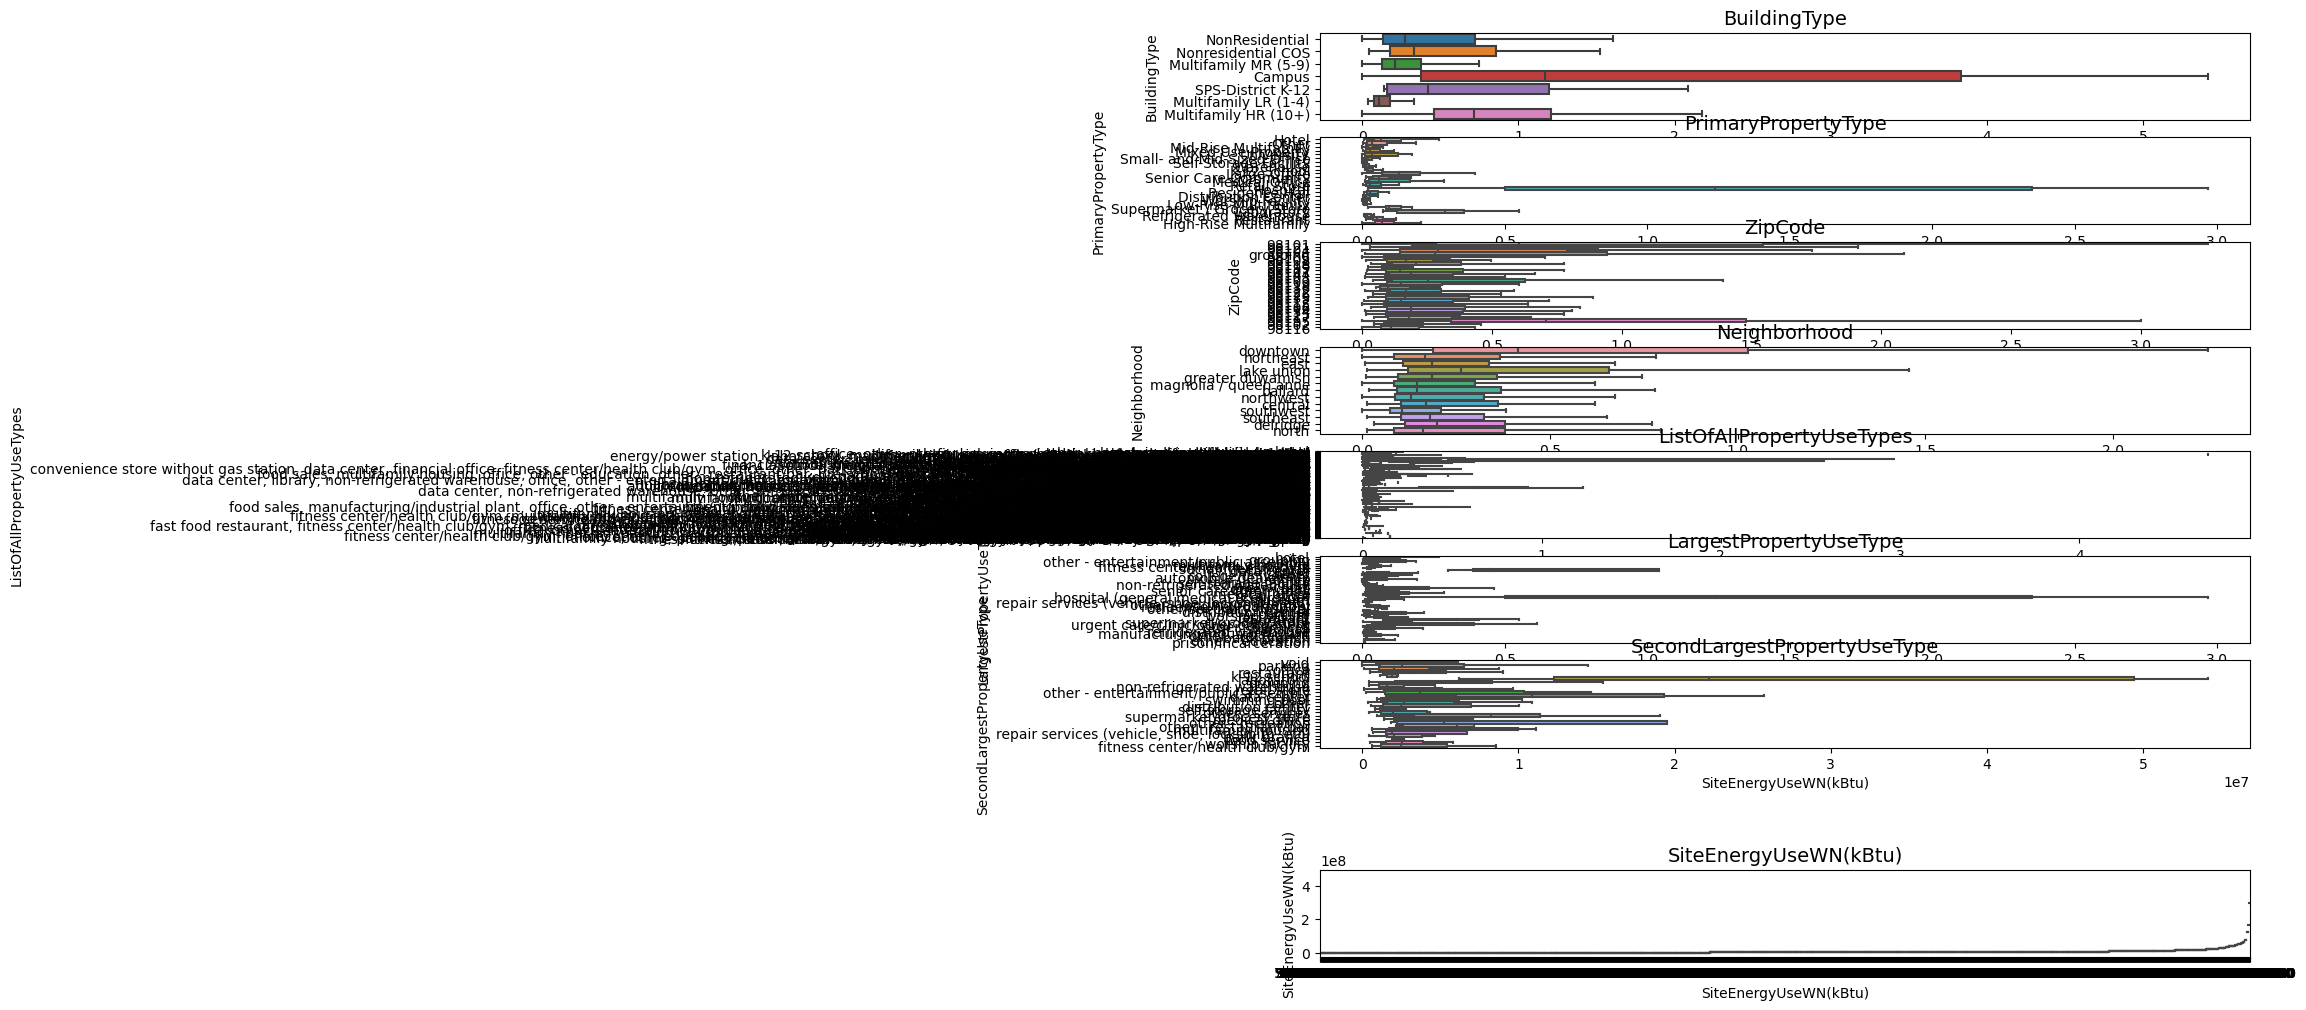

In [21]:
fig = plt.figure(figsize=(12, 12))
X_g = df.select_dtypes(exclude=np.number)
X_g['SiteEnergyUseWN(kBtu)'] = df['SiteEnergyUseWN(kBtu)']
for feat_idx in range(X_g.shape[1]):
    if feat_idx != 7:
        ax = fig.add_subplot(9,1, (feat_idx+1))
        h = sns.boxplot(y = X_g.iloc[:, feat_idx],x = X_g['SiteEnergyUseWN(kBtu)'],ax = ax,showfliers=False)
        ax.set_title(X_g.columns[feat_idx], fontsize=14)
    
del X_g

In [22]:
df.BuildingType.value_counts()

NonResidential          1429
Multifamily LR (1-4)     977
Multifamily MR (5-9)     569
Multifamily HR (10+)     106
Nonresidential COS        81
Campus                    24
SPS-District K-12         10
Name: BuildingType, dtype: int64

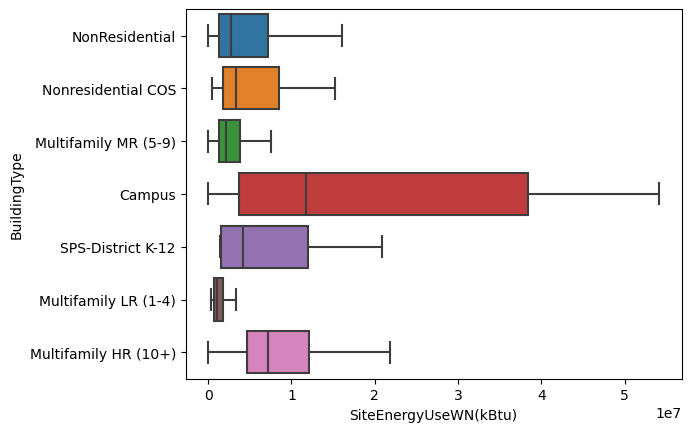

In [23]:
sns.boxplot(data=df,x = 'SiteEnergyUseWN(kBtu)', y = 'BuildingType',showfliers=False );

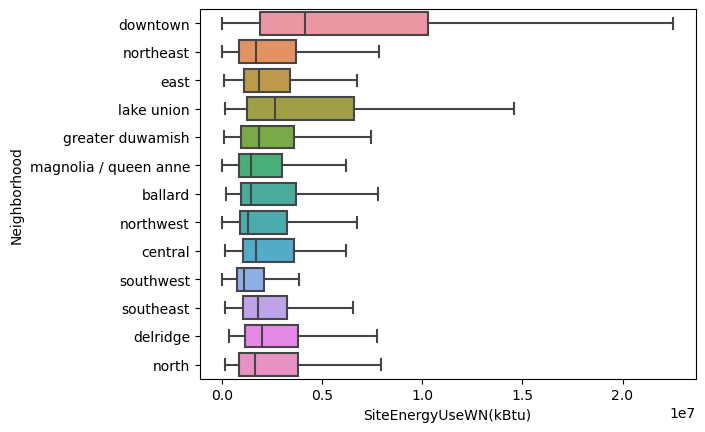

In [24]:
sns.boxplot(data=df,x = 'SiteEnergyUseWN(kBtu)', y = 'Neighborhood',showfliers=False);

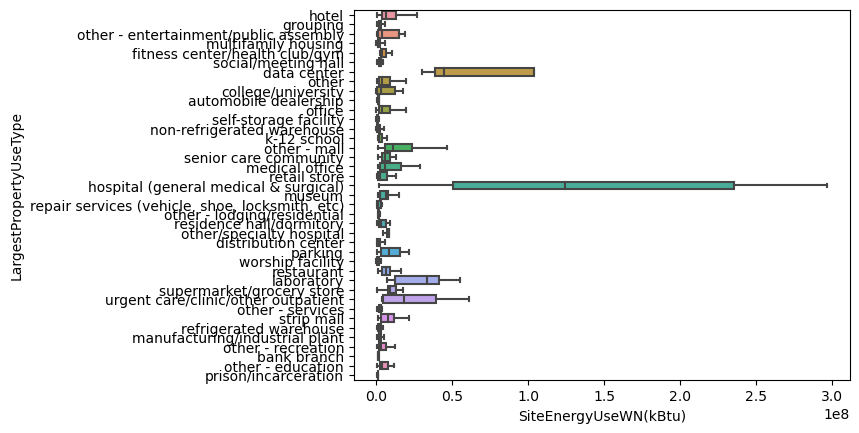

In [25]:
sns.boxplot(data=df,x = 'SiteEnergyUseWN(kBtu)', y = 'LargestPropertyUseType',showfliers=False);

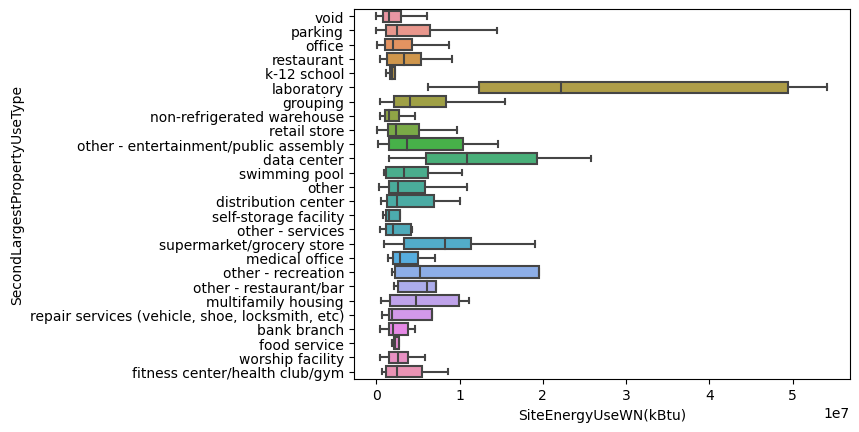

In [26]:
sns.boxplot(data=df,x = 'SiteEnergyUseWN(kBtu)', y = 'SecondLargestPropertyUseType',showfliers=False);

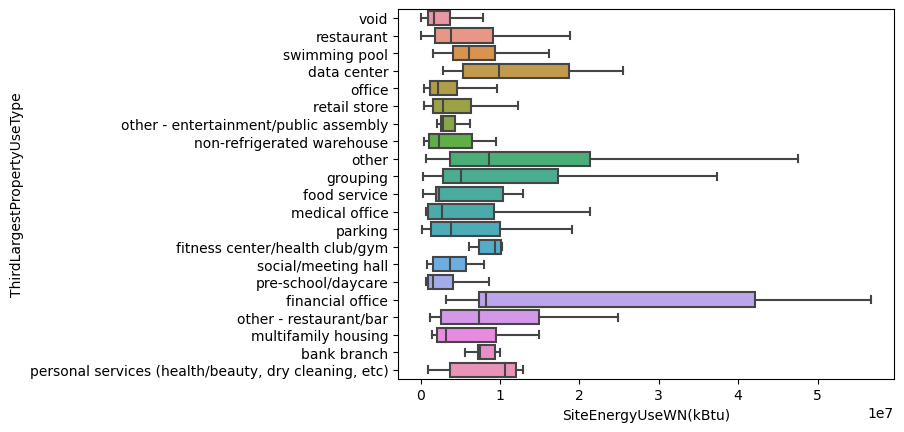

In [27]:
sns.boxplot(data=df,x = 'SiteEnergyUseWN(kBtu)', y = 'ThirdLargestPropertyUseType' ,showfliers=False);

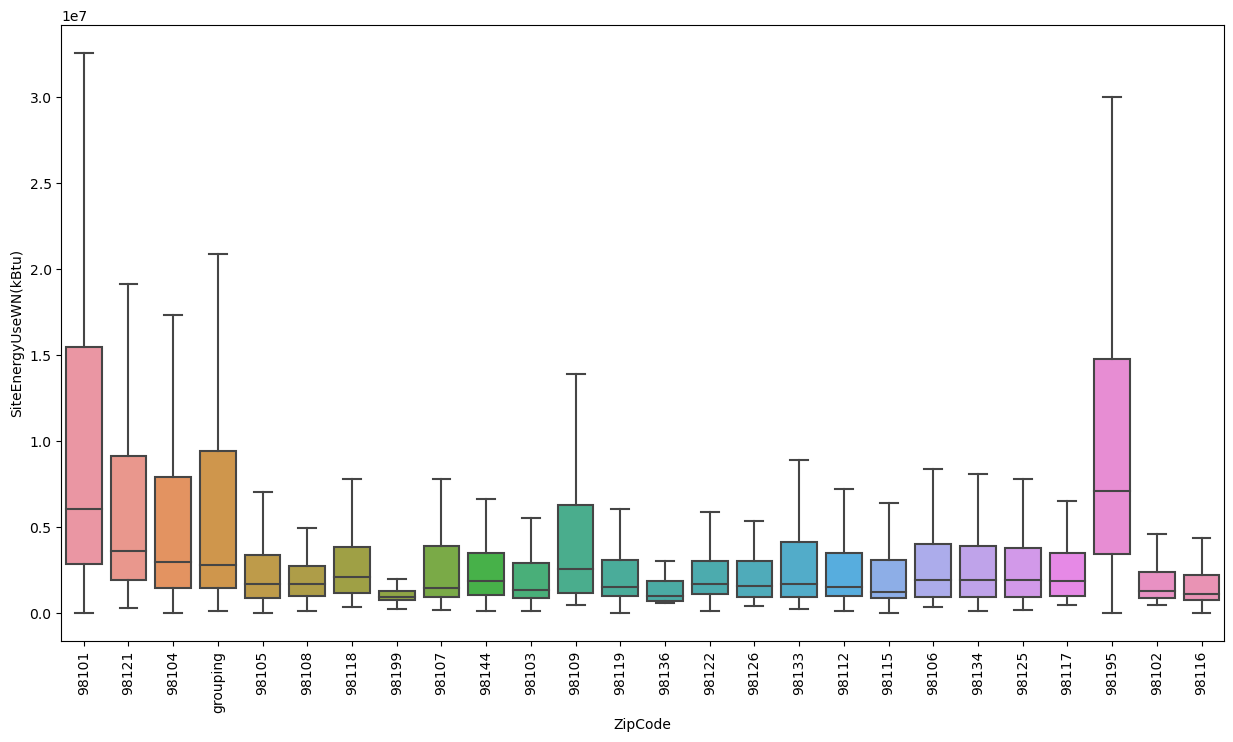

In [28]:
plt.figure(figsize=(15,8))
g = sns.boxplot(data=df,y = 'SiteEnergyUseWN(kBtu)', x = 'ZipCode',showfliers=False,)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

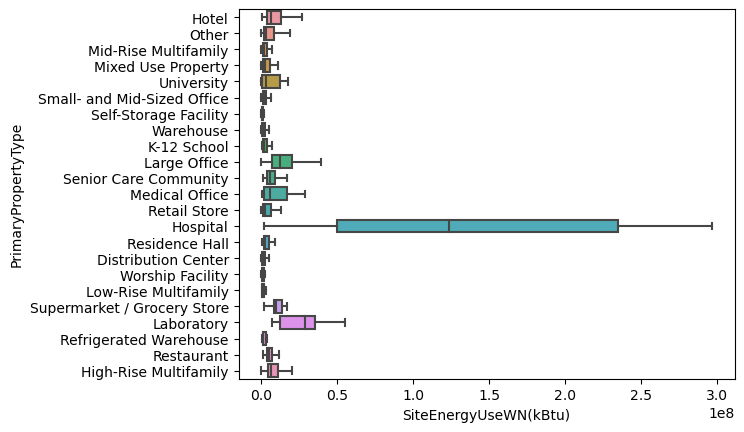

In [29]:
sns.boxplot(data=df,x = 'SiteEnergyUseWN(kBtu)', y = 'PrimaryPropertyType',showfliers=False);

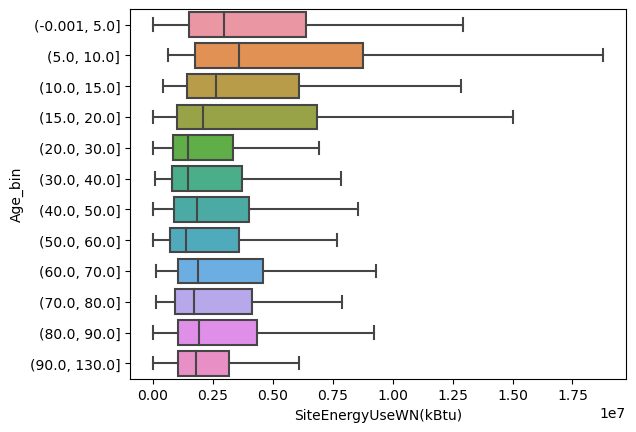

In [30]:
X_num_to_test = df.select_dtypes(include=np.number).copy()
X_num_to_test['Age_bin'] = pd.cut(X_num_to_test.Age,bins=[0,5,10,15,20,30,40,50,60,70,80,90,130],include_lowest=True)
sns.boxplot(data=X_num_to_test,x = 'SiteEnergyUseWN(kBtu)', y = 'Age_bin',showfliers=False);
del X_num_to_test

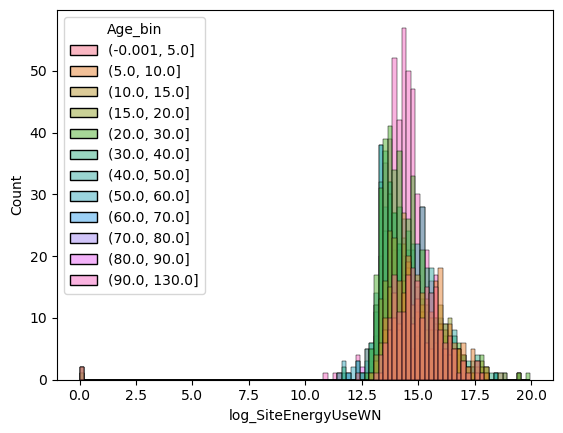

In [31]:
X_num_to_test = df.select_dtypes(include=np.number).copy()
X_num_to_test['log_SiteEnergyUseWN'] = np.log1p(X_num_to_test['SiteEnergyUseWN(kBtu)'])
X_num_to_test['Age_bin'] = pd.cut(X_num_to_test.Age,bins=[0,5,10,15,20,30,40,50,60,70,80,90,130],include_lowest=True)
sns.histplot(data=X_num_to_test,x = 'log_SiteEnergyUseWN', hue = 'Age_bin')
del X_num_to_test

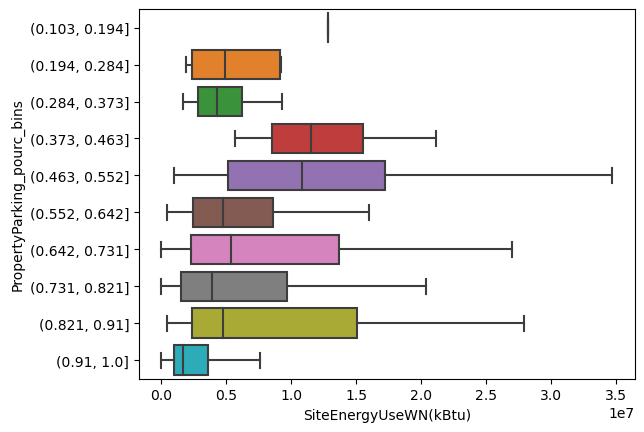

In [32]:
X_num_to_test = df.select_dtypes(include=np.number).copy()
X_num_to_test['PropertyBuilding_pourc'] = X_num_to_test['PropertyGFABuilding(s)']/X_num_to_test['PropertyGFATotal']
X_num_to_test['PropertyParking_pourc_bins'] = pd.cut(X_num_to_test.PropertyBuilding_pourc,bins=10,include_lowest=True)
sns.boxplot(data=X_num_to_test,x = 'SiteEnergyUseWN(kBtu)', y = 'PropertyParking_pourc_bins',showfliers=False);
del X_num_to_test

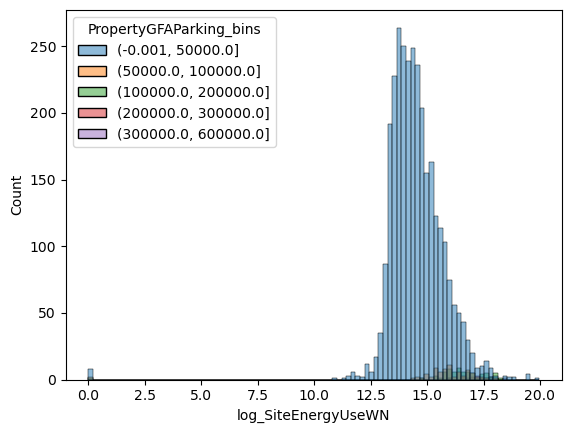

In [33]:
X_num_to_test = df.select_dtypes(include=np.number).copy()
X_num_to_test['log_SiteEnergyUseWN'] = np.log1p(X_num_to_test['SiteEnergyUseWN(kBtu)'])
X_num_to_test['PropertyGFAParking_bins'] = pd.cut(X_num_to_test.PropertyGFAParking,bins=[0,50000,100000,200000,300000,600000],include_lowest=True)
sns.histplot(data=X_num_to_test,x = 'log_SiteEnergyUseWN', hue = 'PropertyGFAParking_bins')
del X_num_to_test

In [34]:
df['Age_bin'] = pd.cut(df.Age,bins=[0,5,10,15,20,50,80,130],include_lowest=True)
df['PropertyGFAParking_bins'] = pd.cut(df.PropertyGFAParking,bins=[0,50000,600000],include_lowest=True,
                                       labels=['<50000','>50000'] )

<div class="alert alert-info">Les colonnes Neighborhood, ZipCode, PropertyGFAParking ne semblent pas importantes.</div> 

### <a name="C33"><font color='teal'>3.3 Transformation des variables</font></a> 

In [35]:
df[['TotalGHGEmissions','SiteEnergyUseWN(kBtu)']].describe()

,TotalGHGEmissions,SiteEnergyUseWN(kBtu)
count,3196.000000,3.196000e+03
mean,122.405904,5.404563e+06
std,552.431116,1.632121e+07
min,-0.800000,0.000000e+00
25%,9.650000,9.881079e+05
50%,34.000000,1.910731e+06
75%,94.500000,4.444625e+06
max,16870.980000,4.716139e+08


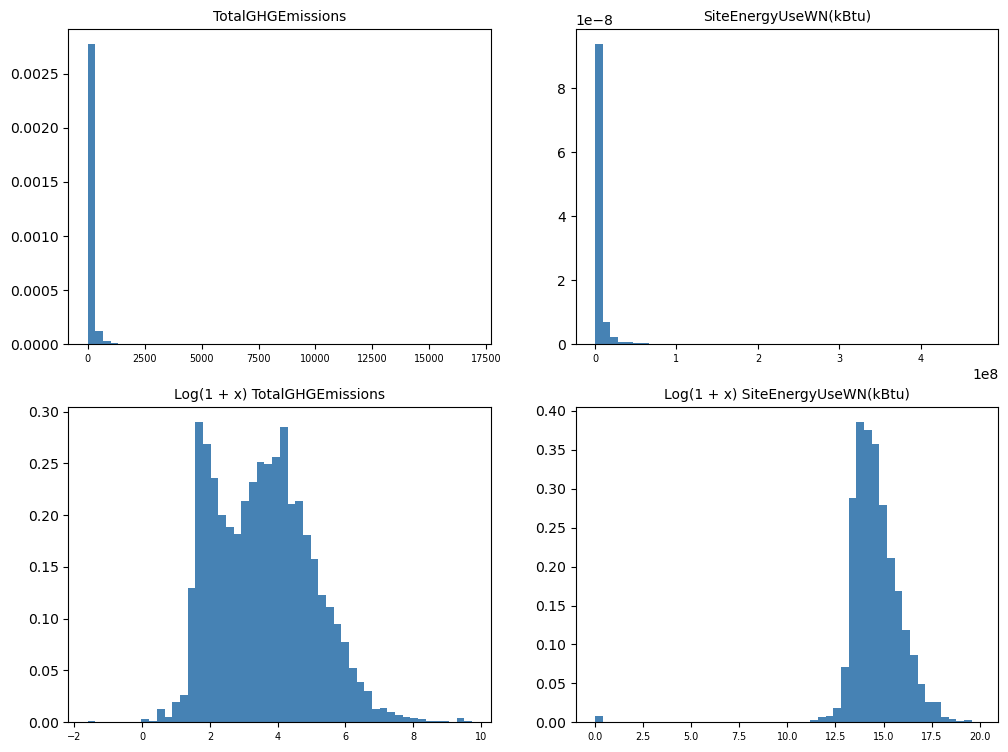

In [36]:
fig = plt.figure(figsize=(12, 9))

for idx,feat in enumerate(['TotalGHGEmissions','SiteEnergyUseWN(kBtu)']):
    for i,tr in enumerate(['raw','log']):
        if tr == 'raw':
            ax = fig.add_subplot(2,2, (idx+i+1))
            h = ax.hist(df[feat], bins=50, color='steelblue', density=True, edgecolor='none')
            ax.set_title(feat, fontsize=10)
            ax.xaxis.set_tick_params(labelsize=7)
        else:
            ax = fig.add_subplot(2,2, (idx+i+2))
            h = ax.hist(np.log1p(df[feat]), bins=50, color='steelblue', density=True, edgecolor='none')
            ax.set_title('Log(1 + x) '+feat, fontsize=10)
            ax.xaxis.set_tick_params(labelsize=7)
            

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
class CustomTransformerytology(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, y, X=None):
        return self
    
    def transform(self, y, X=None):
        # Perform arbitary transformation
        return np.log1p(y)

### <a name="C34"><font color='teal'>3.4 Create X & y</font></a> 

In [38]:
X = df.dropna().drop(columns = ['SiteEnergyUseWN(kBtu)','TotalGHGEmissions','ListOfAllPropertyUseTypes'])#.values ENERGYSTARScore
y = df.dropna()['SiteEnergyUseWN(kBtu)']#.values
X.shape , y.shape

((3194, 27), (3194,))

In [39]:
X.head()

,BuildingType,PrimaryPropertyType,ZipCode,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,Age,sqrt_SecondLargestPropertyUseTypeGFA,sqrt_FloorXBuildingsXm2,SurfaceSolTotal,NombredEtageTotal,SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2,PropertyBuilding_pourc,Age_bin,PropertyGFAParking_bins
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,98101,downtown,hotel,void,void,47.61220,-122.33799,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0,60.0,89.0,0.000000,1072.213598,1149642.0,13.0,0.000000e+00,1.000000,"(80.0, 130.0]",<50000
2,NonResidential,Hotel,98101,downtown,hotel,parking,restaurant,47.61317,-122.33393,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,61.0,20.0,122.735488,1030.545487,1062024.0,12.0,1.552414e+07,0.854547,"(15.0, 20.0]",<50000
3,NonResidential,Hotel,98101,downtown,hotel,void,void,47.61393,-122.33810,1.0,41.0,956110.0,196718.0,759392.0,756493.0,0.0,0.0,43.0,47.0,0.000000,5647.518393,31894464.0,42.0,0.000000e+00,0.794252,"(20.0, 50.0]",>50000
5,NonResidential,Hotel,98101,downtown,hotel,void,void,47.61412,-122.33664,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0,56.0,90.0,0.000000,821.291666,674520.0,11.0,0.000000e+00,1.000000,"(80.0, 130.0]",<50000
8,NonResidential,Hotel,98121,downtown,hotel,parking,swimming pool,47.61375,-122.34047,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0,75.0,36.0,260.785352,1469.020082,2158020.0,19.0,9.990659e+07,0.646885,"(20.0, 50.0]",>50000


In [40]:
y.head()

OSEBuildingID
1     7456910.0
2     8664479.0
3    73937112.0
5     6946800.5
8    14656503.0
Name: SiteEnergyUseWN(kBtu), dtype: float64

### <a name="C35"><font color='teal'>3.5 Train Test Split</font></a> 

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)
print("Notre dataset d'entrainement est une matrice {} et la cible {}".format(X_train.shape,y_train.shape))
print("Notre dataset de test est une matrice au format {} et la cible {}".format(X_test.shape,y_test.shape) )

Notre dataset d'entrainement est une matrice (2235, 27) et la cible (2235,)
Notre dataset de test est une matrice au format (959, 27) et la cible (959,)


### <a name="C36"><font color='teal'>3.6 Label Encoder</font></a> 

In [42]:
df.select_dtypes(exclude=np.number).nunique()

BuildingType                      7
PrimaryPropertyType              23
ZipCode                          26
Neighborhood                     13
ListOfAllPropertyUseTypes       459
LargestPropertyUseType           39
SecondLargestPropertyUseType     26
ThirdLargestPropertyUseType      21
Age_bin                           7
PropertyGFAParking_bins           2
dtype: int64

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# regrpouper les modalité qui represente moins de 10 batiment dans une super modalité

# Create an instance of One-hot-encoder
ohe = OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore') #

# Transform X_train categorical
df_cat_train = ohe.fit_transform(X_train.select_dtypes(exclude=np.number) ) 
df_cat_train = pd.DataFrame(df_cat_train,
                            columns = ohe.get_feature_names_out(),
                            index = X_train.index)

# Create X_train encoded data 
X_train_encod = pd.merge(X_train.select_dtypes(include=np.number),
                        df_cat_train, left_index=True, right_index=True) 


# Transform X_test categorical
df_cat_test = ohe.transform(X_test.select_dtypes(exclude=np.number) ) 
df_cat_test = pd.DataFrame(df_cat_test,
                           columns = ohe.get_feature_names_out(),
                           index = X_test.index)

# Create X_test encoded data 
X_test_encod = pd.merge(X_test.select_dtypes(include=np.number),
                        df_cat_test, left_index=True, right_index=True) 


In [44]:
X_train_encod.head()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,Age,sqrt_SecondLargestPropertyUseTypeGFA,sqrt_FloorXBuildingsXm2,SurfaceSolTotal,NombredEtageTotal,SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2,PropertyBuilding_pourc,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_High-Rise Multifamily,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mid-Rise Multifamily,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,ZipCode_98102,ZipCode_98103,ZipCode_98104,ZipCode_98105,ZipCode_98106,ZipCode_98107,ZipCode_98108,ZipCode_98109,ZipCode_98112,ZipCode_98115,ZipCode_98116,ZipCode_98117,ZipCode_98118,ZipCode_98119,ZipCode_98121,ZipCode_98122,ZipCode_98125,ZipCode_98126,ZipCode_98133,ZipCode_98134,ZipCode_98136,ZipCode_98144,ZipCode_98195,ZipCode_98199,ZipCode_grouping,Neighborhood_central,Neighborhood_delridge,Neighborhood_downtown,Neighborhood_east,Neighborhood_greater duwamish,Neighborhood_lake union,Neighborhood_magnolia / queen anne,Neighborhood_north,Neighborhood_northeast,Neighborhood_northwest,Neighborhood_southeast,Neighborhood_southwest,LargestPropertyUseType_bank branch,LargestPropertyUseType_college/university,LargestPropertyUseType_data center,LargestPropertyUseType_distribution center,LargestPropertyUseType_fitness center/health club/gym,LargestPropertyUseType_grouping,LargestPropertyUseType_hospital (general medical & surgical),LargestPropertyUseType_hotel,LargestPropertyUseType_k-12 school,LargestPropertyUseType_laboratory,LargestPropertyUseType_manufacturing/industrial plant,LargestPropertyUseType_medical office,LargestPropertyUseType_multifamily housing,LargestPropertyUseType_museum,LargestPropertyUseType_non-refrigerated warehouse,LargestPropertyUseType_office,LargestPropertyUseType_other,LargestPropertyUseType_other - education,LargestPropertyUseType_other - entertainment/public assembly,LargestPropertyUseType_other - lodging/residential,LargestPropertyUseType_other - mall,LargestPropertyUseType_other - recreation,LargestPropertyUseType_other - services,LargestPropertyUseType_other/specialty hospital,LargestPropertyUseType_parking,LargestPropertyUseType_prison/incarceration,LargestPropertyUseType_refrigerated warehouse,"LargestPropertyUseType_repair services (vehicle, shoe, locksmith, etc)",LargestPropertyUseType_residence hall/dormitory,LargestPropertyUseType_restaurant,LargestPropertyUseType_retail store,LargestPropertyUseType_self-storage facility,LargestPropertyUseType_senior care community,LargestPropertyUseType_social/meeting hall,LargestPropertyUseType_strip mall,LargestPropertyUseType_supermarket/grocery store,LargestPropertyUseType_urgent care/clinic/other outpatient,LargestPropertyUseType_worship facility,SecondLargestPropertyUseType_data center,SecondLargestPropertyUseType_distribution center,SecondLargestPropertyUseType_fitness center/health club/gym,SecondLargestPropertyUseType_food service,SecondLargestPropertyUseType_grouping,SecondLargestPropertyUseType_k-12 school,SecondLargestPropertyUseType_laboratory,SecondLargestPropertyUseType_medical office,Second

In [45]:
X_train_encod.shape,X_test_encod.shape

((2235, 172), (959, 172))

### <a name="C37"><font color='teal'>3.7 Scaling</font></a> 

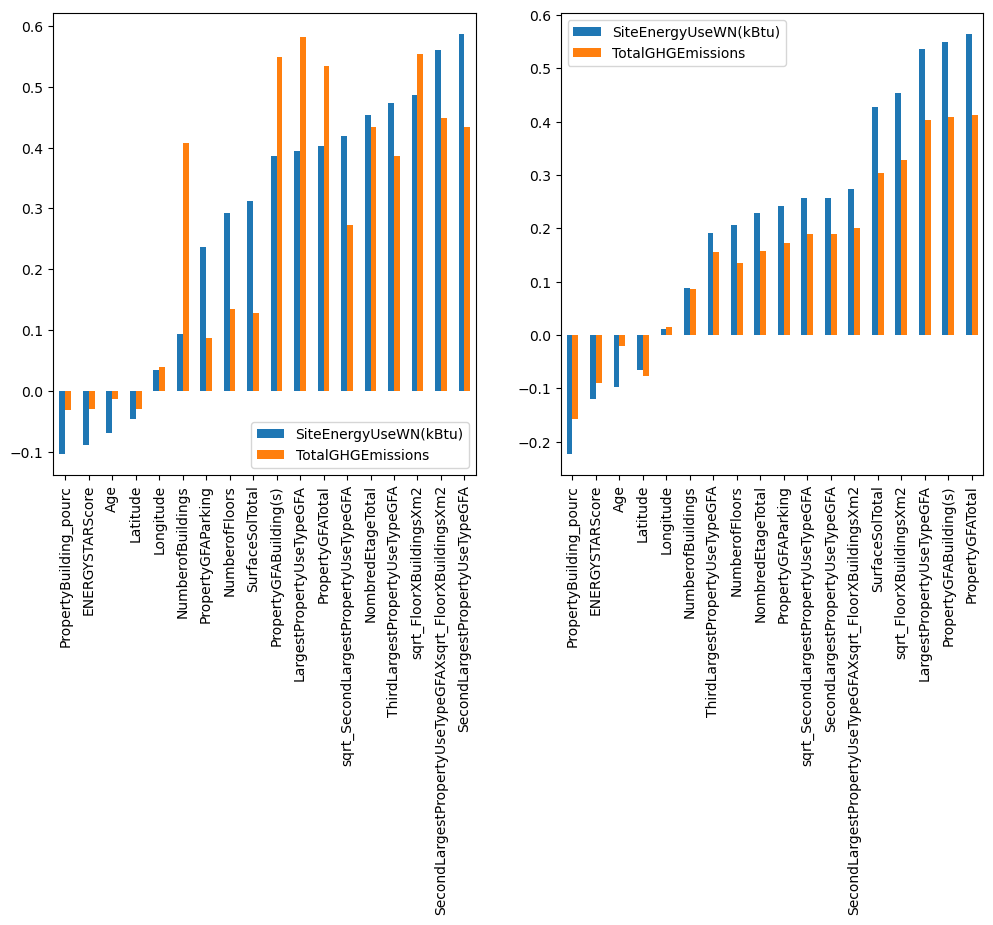

In [46]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(1, 2, 1)
df.corr()[['SiteEnergyUseWN(kBtu)','TotalGHGEmissions']].sort_values(by=['SiteEnergyUseWN(kBtu)','TotalGHGEmissions'])\
.drop(['SiteEnergyUseWN(kBtu)','TotalGHGEmissions']).plot(kind='bar',ax = ax1)


ax2 = plt.subplot(1, 2, 2)
df.corr(method = 'kendall')[['SiteEnergyUseWN(kBtu)','TotalGHGEmissions']].sort_values(by=['SiteEnergyUseWN(kBtu)','TotalGHGEmissions'])\
.drop(['SiteEnergyUseWN(kBtu)','TotalGHGEmissions']).plot(kind='bar',ax = ax2);

In [47]:
X_train.select_dtypes(exclude=[np.number]).columns

Index(['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'Age_bin', 'PropertyGFAParking_bins'],
      dtype='object')

In [48]:
X_train.select_dtypes(include=[np.number]).columns

Index(['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'Age',
       'sqrt_SecondLargestPropertyUseTypeGFA', 'sqrt_FloorXBuildingsXm2',
       'SurfaceSolTotal', 'NombredEtageTotal',
       'SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2',
       'PropertyBuilding_pourc'],
      dtype='object')

##### <font color='teal'>3.7.1 Scaling Reduct DataSet</font>

In [49]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler,Normalizer
X_train_reduct = X_train[['sqrt_SecondLargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2','sqrt_FloorXBuildingsXm2']]
X_test_reduct = X_test[['sqrt_SecondLargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2','sqrt_FloorXBuildingsXm2']]

ScalerReduct = StandardScaler().fit(X_train_reduct)
X_train_reduct_scaled = ScalerReduct.transform(X_train_reduct)
X_test_reduct_scaled = ScalerReduct.transform(X_test_reduct)

##### <font color='teal'>3.7.2 Scaling Encoding Data</font>

In [50]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler,Normalizer
Scaler = StandardScaler().fit(X_train_encod)
X_train_encod_scaled = Scaler.transform(X_train_encod)
X_test_encod_scaled = Scaler.transform(X_test_encod)

##### <font color='teal'>3.7.3 Scaling without encoding data</font>

In [51]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler,Normalizer
ScalerWED = StandardScaler().fit(X_train.select_dtypes(include=[np.number]))
X_train_scaled = ScalerWED.transform( X_train.select_dtypes(include=[np.number]) )
X_test_scaled = ScalerWED.transform( X_test.select_dtypes(include=[np.number]) )

### <a name="C38"><font color='teal'>3.8 Feature Selection</font></a> 

<font color='green'> RFE : Élimination récursive des fonctionnalités </font>

In [52]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

min_features_to_select = 1  # Minimum number of features to consider
reg = RandomForestRegressor(max_depth=5)
#reg = LinearRegression()
cv = KFold(3)

rfecv = RFECV(
    estimator=reg,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=min_features_to_select,
    n_jobs=11,
)
rfecv.fit(pd.DataFrame(X_train_encod_scaled,columns=Scaler.feature_names_in_), y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 14
CPU times: total: 2min 13s
Wall time: 4min 5s


In [53]:
rfecv.get_feature_names_out()

array(['Latitude', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'sqrt_SecondLargestPropertyUseTypeGFA', 'SurfaceSolTotal',
       'PrimaryPropertyType_Hospital', 'ZipCode_98122',
       'LargestPropertyUseType_hospital (general medical & surgical)',
       'LargestPropertyUseType_multifamily housing',
       'LargestPropertyUseType_other'], dtype=object)

In [184]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

min_features_to_select = 1  # Minimum number of features to consider
reg = GradientBoostingRegressor()

cv = KFold(3)

rfecvGB = RFECV(
    estimator=reg,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=min_features_to_select,
    n_jobs=11,
)
rfecvGB.fit(pd.DataFrame(X_train_encod_scaled,columns=Scaler.feature_names_in_), y_train)

print(f"Optimal number of features: {rfecvGB.n_features_}")

Optimal number of features: 18
CPU times: total: 1min 56s
Wall time: 3min 28s


In [185]:
rfecvGB.get_feature_names_out()

array(['Latitude', 'Longitude', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'sqrt_SecondLargestPropertyUseTypeGFA', 'sqrt_FloorXBuildingsXm2',
       'SurfaceSolTotal',
       'SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2',
       'PrimaryPropertyType_Hospital', 'ZipCode_98122',
       'LargestPropertyUseType_data center',
       'LargestPropertyUseType_hospital (general medical & surgical)',
       'LargestPropertyUseType_multifamily housing',
       'LargestPropertyUseType_other'], dtype=object)

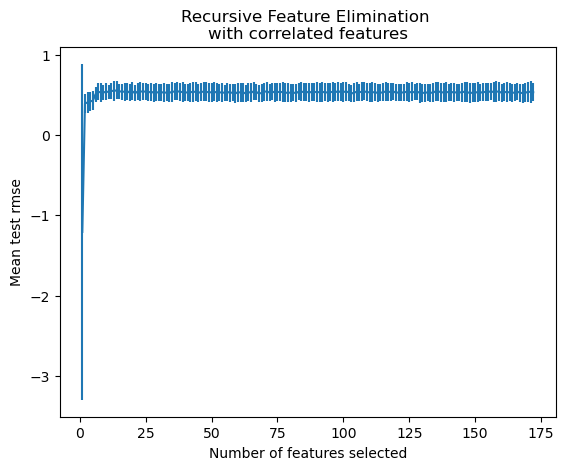

CPU times: total: 141 ms
Wall time: 124 ms


In [54]:
%%time
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test rmse")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

<font color='green'> SelectFromModel </font>

<font color='green'> Model-based and sequential feature selection </font>

In [55]:
import time

In [ ]:
%%time
### Sélection de fonctions avec Sequential Feature Selection 
from sklearn.feature_selection import SequentialFeatureSelector

regSFS = GradientBoostingRegressor()

tic_fwd = time.time()
sfs_forward = SequentialFeatureSelector( regSFS, 
                                        n_features_to_select='auto', 
                                        direction="forward",n_jobs = -1
                                       ).fit(X_train_encod_scaled, y_train)
toc_fwd = time.time()


print(
    "Features selected by forward sequential selection: "
    f"{Scaler.feature_names_in_[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")


In [ ]:
tic_bwd = time.time()
sfs_backward = SequentialFeatureSelector(
    regSFS, 
    n_features_to_select = 'auto', 
    direction="backward",n_jobs = -1 ).fit(X_train_encod_scaled, y_train)
toc_bwd = time.time()

print(
    "Features selected by backward sequential selection: "
    f"{Scaler.feature_names_in_[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

#### <div class="alert alert-info"><font color='teal'> Liste des colonnes conservées</font></div>

In [ ]:
col_cons = rfecv.get_feature_names_out().to_list()

In [56]:
col_cons = ['Latitude', 'Longitude', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'sqrt_SecondLargestPropertyUseTypeGFA', 'sqrt_FloorXBuildingsXm2',
       'SurfaceSolTotal', 'NombredEtageTotal',
       'PrimaryPropertyType_Hospital',
       'LargestPropertyUseType_hospital (general medical & surgical)',
       'LargestPropertyUseType_multifamily housing',
       'LargestPropertyUseType_other']

##### <font color='teal'>3.8.1 Scaling Reduct DataSet</font>

In [135]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler,Normalizer


X_train_reduct = X_train_encod[col_cons]
X_test_reduct = X_test_encod[col_cons]

ScalerReduct = StandardScaler().fit(X_train_reduct)
X_train_reduct_scaled = ScalerReduct.transform(X_train_reduct)
X_test_reduct_scaled = ScalerReduct.transform(X_test_reduct)

<hr>

</br>

# <a name="C4"><font color='green'>**Partie 4 : Modélisation**</font></a> 

### <a name="C41"><font color='green'>4.1 Dummy Estimator</font></a> 

In [70]:
warnings.filterwarnings(action='ignore')

#y numerique
naifMean = dummy.DummyRegressor(strategy='mean')
naifMedian = dummy.DummyRegressor(strategy='median')

meanNaifCV = cross_val_score(naifMean,X_train_reduct_scaled,y_train,scoring="neg_mean_squared_error")
medianNaifCV = cross_val_score(naifMedian,X_train_reduct_scaled,y_train,scoring="neg_mean_squared_error")

print( "Le score neg_mean_squared_error du DummyRegressor strategy 'mean' est {}".format(meanNaifCV.mean()))
print( "Le score neg_mean_squared_error du DummyRegressor strategy 'median' est {}".format( medianNaifCV.mean() ))

# print( "Le score r2 du {} est {}".format())

Le score neg_mean_squared_error du DummyRegressor strategy 'mean' est -215436750381864.44
Le score neg_mean_squared_error du DummyRegressor strategy 'median' est -226020181902294.66


### <a name="C42"><font color='green'>4.2 Model type</font></a> 

In [71]:
def compute_score(reg, X, y):
    xval = cross_val_score(reg, X, y, cv = 5,scoring='r2')
    return np.mean(xval)

In [72]:
compute_score(LinearRegression(), X_train_reduct_scaled,y_train)

0.01184244793642968

In [73]:
compute_score(RandomForestRegressor(n_jobs=7,max_depth=10,n_estimators = 200), X_train_reduct_scaled,y_train)

0.6167994560114014

### <a name="C43"><font color='green'>4.3 Benchmark</font></a> 

In [74]:
# Init inner and outer loop
inner_cv = KFold(n_splits=3,shuffle=True,random_state=0)
outer_cv = KFold(n_splits=3,shuffle=True,random_state=1)

In [90]:
from sklearn.model_selection import cross_validate

def do_cross_validation_upgrade(clf,X,y, print_model=False):
    cv = cross_validate(clf, X, y, scoring=('r2', 'neg_mean_squared_error'), cv=outer_cv)
    
    scores_neg_mean_squared_error = ' + '.join(f'{s:.2f}' for s in cv["test_neg_mean_squared_error"])
    scores_r2 = ' + '.join(f'{s:.2f}' for s in cv["test_r2"])
    
    mean_r2 = cv["test_r2"].mean()
    mean_nRMSE = cv["test_neg_mean_squared_error"].mean()
    
    msg_r2 = f'Cross-validated r2: ({scores_r2}) / 3 = {mean_r2:.2f}'
    msg_nRMSE = f'Cross-validated rmse: ({scores_neg_mean_squared_error}) / 3 = {mean_nRMSE:.2f}'
    
    if print_model:
        msg_nRMSE = f'{clf}:\n\t{msg_nRMSE}\n'
        msg_r2 = f'{clf}:\n\t{msg_r2}\n'
    
    print(msg_nRMSE)
    print('\n')
    print(msg_r2)
    
def do_cross_validation(clf,X,y, print_model=False):
    cv = cross_validate(clf, X, y, scoring=('r2', 'neg_mean_squared_error'), cv=outer_cv)
    scores = ' + '.join(f'{s:.2f}' for s in cv["test_score"])
    mean_ = cv["test_score"].mean()
    msg = f'Cross-validated rmse: ({scores}) / 3 = {mean_:.2f}'
    
    if print_model:
        msg = f'{clf}:\n\t{msg}\n'
    
    print(msg)

<font color='red'> 4.3.0 Linear Model</font>

In [91]:
%%time
from sklearn.linear_model import LinearRegression

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
lm_grid = GridSearchCV(LinearRegression(n_jobs= 7), 
                       param_grid={'fit_intercept': [True,False],
                                   'positive' : [True,False]
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(lm_grid,X_train_reduct_scaled, y_train, print_model=False)

Cross-validated rmse: (-541717940889703.19 + -251744130821855.91 + -54783684597821.90) / 3 = -282748585436460.31


Cross-validated r2: (-2.71 + 0.42 + 0.16) / 3 = -0.71
CPU times: total: 453 ms
Wall time: 126 ms


In [92]:
%%time
from sklearn.linear_model import Ridge

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
Ridge_grid = GridSearchCV(Ridge(max_iter=20000), 
                       param_grid={'fit_intercept': [True,False],
                                   'alpha':[0.1, 1.0, 10.0,20,50,100],
                                   'solver':[ "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
                                   
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(Ridge_grid,X_train_reduct_scaled, y_train, print_model=False)

Cross-validated rmse: (-538217768134359.94 + -252322069712317.47 + -46999097481956.41) / 3 = -279179645109544.59


Cross-validated r2: (-2.69 + 0.42 + 0.28) / 3 = -0.66
CPU times: total: 35.7 s
Wall time: 13.3 s


In [93]:
%%time
from sklearn.linear_model import Lasso

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
Lasso_grid = GridSearchCV(Lasso(max_iter=20000), 
                       param_grid={'fit_intercept': [True,False],
                                   'alpha':[0.1, 1.0, 10.0,20,50,100,500],
                                   'positive' : [True,False],
                                   'selection':['cyclic', 'random']
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(Lasso_grid,X_train_reduct_scaled, y_train, print_model=False)

Cross-validated rmse: (-541717906838526.00 + -253822062669804.06 + -54783573005376.84) / 3 = -283441180837902.31


Cross-validated r2: (-2.71 + 0.41 + 0.16) / 3 = -0.71
CPU times: total: 5.5 s
Wall time: 3.79 s


In [94]:
%%time
from sklearn.linear_model import ElasticNet

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
ElasticNet_grid = GridSearchCV(ElasticNet(max_iter=20000), 
                       param_grid={'fit_intercept': [True,False],
                                   'alpha':[0.1, 1.0, 10.0,20,50,100,500],
                                   'positive' : [True,False],
                                   'l1_ratio':[0.01,0.1,0.2,0.5,0.7,0.9],
                                   'selection':['cyclic', 'random']
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(ElasticNet_grid,X_train_reduct_scaled, y_train, print_model=False)

Cross-validated rmse: (-94535464933808.56 + -337891394824804.25 + -40494164645624.38) / 3 = -157640341468079.06


Cross-validated r2: (0.35 + 0.22 + 0.38) / 3 = 0.32
CPU times: total: 5.81 s
Wall time: 4.65 s


<font color='red'> 4.3.1. RandomForestRegressor</font>

In [117]:
%%time
from sklearn.ensemble import RandomForestRegressor

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
rf_grid = GridSearchCV(RandomForestRegressor(random_state=0,n_jobs= 7), 
                       param_grid={'n_estimators': [100,200,500,750],
                                   'criterion' : ['squared_error', 'absolute_error', 'poisson'],
                                   'max_depth' : [None,3,5,10],
                                   'max_features' : [1.0, 'sqrt', 'log2',int(X_train_encod_scaled.shape[1]/3)],
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(rf_grid,X_train_reduct_scaled, y_train, print_model=False)

Cross-validated rmse: (-54640996048488.26 + -268322295266508.59 + -18839157314004.96) / 3 = -113934149543000.61


Cross-validated r2: (0.63 + 0.38 + 0.71) / 3 = 0.57
CPU times: total: 10min 23s
Wall time: 32min 37s


<font color='red'>4.3.2. BaggingRegressor</font>

In [96]:
%%time
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor

###### BaggingRegressor inner loop
bagg_grid = GridSearchCV(BaggingRegressor(random_state=0,n_jobs = 2,oob_score=False),
                         param_grid={'n_estimators': [5,100,200, 500]},
                         cv=inner_cv,n_jobs= 3,scoring='neg_mean_squared_error')
# BaggingRegressor outer loop
do_cross_validation_upgrade(bagg_grid,X_train_reduct_scaled, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=BaggingRegressor(n_jobs=2, random_state=0), n_jobs=3,
             param_grid={'n_estimators': [5, 100, 200, 500]},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-48989284770231.43 + -251633034000629.53 + -18465750550861.04) / 3 = -106362689773907.33



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=BaggingRegressor(n_jobs=2, random_state=0), n_jobs=3,
             param_grid={'n_estimators': [5, 100, 200, 500]},
             scoring='neg_mean_squared_error'):
	Cross-validated r2: (0.66 + 0.42 + 0.72) / 3 = 0.60

CPU times: total: 672 ms
Wall time: 27.2 s


<font color='red'>4.3.3.AdaBoostRegressor</font>

In [97]:
%%time
from sklearn.ensemble import AdaBoostRegressor

###### AdaBoostRegressor inner loop
Ada_grid = GridSearchCV(AdaBoostRegressor(random_state=0), 
                         param_grid={'n_estimators': [5,50,100,200, 500],
                                    "loss":["linear", "square", "exponential"],
                                     'learning_rate': [0.1,0.2,0.5,1]
                                    },cv=inner_cv,n_jobs= 7,scoring='neg_mean_squared_error')
                        
# AdaBoostRegressor outer loop
do_cross_validation_upgrade(Ada_grid,X_train_reduct_scaled, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostRegressor(random_state=0), n_jobs=7,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [5, 50, 100, 200, 500]},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-78367172287636.72 + -246927919958555.09 + -25983918339588.44) / 3 = -117093003528593.42



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostRegressor(random_state=0), n_jobs=7,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [5, 50, 100, 200, 500]},
             scoring='neg_mean_squared_error'):
	Cross-validated r2: (0.46 + 0.43 + 0.60) / 3 = 0.50

CPU times: total: 1.69 s
Wall time: 47.1 s


<font color='red'>4.3.4. Support Vector Machine Regressor RBF</font>

In [98]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-300,300,5)
params_grid_rbf = { 'gamma': gamma_to_test,
                  'C' : [0.2, 0.5, 1.0, 5, 20]
                  }

###### svc inner loop
svr_rbf_grid = GridSearchCV(estimator=SVR(kernel='rbf'), 
                      param_grid = params_grid_rbf,
                      cv=inner_cv, 
                      n_jobs=4,scoring='neg_mean_squared_error')
# svc outer loop
do_cross_validation_upgrade(svr_rbf_grid,X_train_reduct_scaled, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(), n_jobs=4,
             param_grid={'C': [0.2, 0.5, 1.0, 5, 20],
                         'gamma': array([1.e-300, 1.e-150, 1.e+000, 1.e+150, 1.e+300])},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-155472449496843.25 + -449540937991961.62 + -72929819026452.97) / 3 = -225981068838419.28



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(), n_jobs=4,
             param_grid={'C': [0.2, 0.5, 1.0, 5, 20],
                         'gamma': array([1.e-300, 1.e-150, 1.e+000, 1.e+150, 1.e+300])},
             scoring='neg_mean_squared_error'):
	Cross-validated r2: (-0.07 + -0.04 + -0.12) / 3 = -0.07

CPU times: total: 953 ms
Wall time: 10.7 s


<font color='red'>4.3.5. Support Vector Machine Regressor sigmoid</font>

In [99]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-100,300,6)
params_grid_sigmoid = {
    'coef0':[0,0.5,500],
    'gamma': gamma_to_test
}

###### svc inner loop
svr_sigmoid_grid = GridSearchCV(estimator=SVR(kernel='sigmoid'), 
                      param_grid=params_grid_sigmoid,
                      cv=inner_cv, 
                      n_jobs = 7 ,scoring='neg_mean_squared_error')
# svc outer loop
do_cross_validation_upgrade(svr_sigmoid_grid,X_train_reduct_scaled, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='sigmoid'), n_jobs=7,
             param_grid={'coef0': [0, 0.5, 500],
                         'gamma': array([1.e-100, 1.e-020, 1.e+060, 1.e+140, 1.e+220, 1.e+300])},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-155470313381237.53 + -449535278463382.25 + -72928666353705.17) / 3 = -225978086066108.28



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='sigmoid'), n_jobs=7,
             param_grid={'coef0': [0, 0.5, 500],
                         'gamma': array([1.e-100, 1.e-020, 1.e+060, 1.e+140, 1.e+220, 1.e+300])},
             scoring='neg_mean_squared_error'):
	Cross-validated r2: (-0.07 + -0.04 + -0.12) / 3 = -0.07

CPU times: total: 750 ms
Wall time: 6.66 s


<font color='red'>4.3.6. Support Vector Machine Regressor linear</font>

In [120]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-3,3,5)
params_grid_linear = { 'C':[0.5,1,2] }

###### svc inner loop
svr_rbf_linear = GridSearchCV(estimator=SVR(kernel='linear'), 
                      param_grid=params_grid_linear,
                      cv=inner_cv, 
                      n_jobs=7,scoring='r2')
# svc outer loop
do_cross_validation_upgrade(svr_rbf_linear,X_train_reduct_scaled, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='linear'), n_jobs=7,
             param_grid={'C': [0.5, 1, 2]}, scoring='r2'):
	Cross-validated rmse: (-155389748876987.22 + -449427768789714.31 + -72888005218473.88) / 3 = -225901840961725.12



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='linear'), n_jobs=7,
             param_grid={'C': [0.5, 1, 2]}, scoring='r2'):
	Cross-validated r2: (-0.07 + -0.04 + -0.12) / 3 = -0.07

CPU times: total: 703 ms
Wall time: 2.36 s


<font color='red'>4.3.6. Support Vector Machine Regressor poly</font>

In [121]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-3,3,5)
params_grid_poly = { 'C':[0.5,1,2],
                     'degree': [0.5,2,3,5],
                     'coef0':[0,1,5]
                     }

###### svc inner loop
svr_rbf_poly = GridSearchCV(estimator=SVR(kernel='poly'), 
                      param_grid=params_grid_linear,
                      cv=inner_cv, 
                      n_jobs=7,scoring='neg_mean_squared_error')
# svc outer loop
do_cross_validation_upgrade(svr_rbf_poly,X_train_reduct_scaled, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='poly'), n_jobs=7,
             param_grid={'C': [0.5, 1, 2]}, scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-154790429209424.50 + -448740511172819.19 + -72873647977640.77) / 3 = -225468196119961.50



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='poly'), n_jobs=7,
             param_grid={'C': [0.5, 1, 2]}, scoring='neg_mean_squared_error'):
	Cross-validated r2: (-0.06 + -0.04 + -0.12) / 3 = -0.07

CPU times: total: 406 ms
Wall time: 811 ms


<font color='red'>4.3.7. Gradient Boosting Regressor </font>

In [105]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

params_grid_gb = {'n_estimators': [5,100,200, 500],
                  'loss' : ['squared_error', 'absolute_error', 'huber'],
                  'learning_rate' : [0.1,0.2,0.5,1],
                 }

###### Gradient Boosting Regressor inner loop
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=0), 
                       param_grid = params_grid_gb,
                       cv=inner_cv, 
                       n_jobs=4,
                       scoring='neg_mean_squared_error')

# Gradient Boosting Regressor outer loop
do_cross_validation_upgrade(gb_grid,X_train_reduct_scaled, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=0), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber'],
                         'n_estimators': [5, 100, 200, 500]},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-54316294683122.99 + -239439760649376.56 + -13601531330323.25) / 3 = -102452528887607.61



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=0), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber'],
                         'n_estimators': [5, 100, 200, 500]},
             scoring='neg_mean_squared_error'):
	Cross-validated r2: (0.63 + 0.45 + 0.79) / 3 = 0.62

CPU times: total: 6.03 s
Wall time: 1min 31s


<font color='red'>4.3.8. XGBoost Regressor </font>

In [102]:
%%time
# https://xgboost.readthedocs.io/en/latest/parameter.html
import xgboost as xgb
from sklearn.metrics import mean_squared_error

params_grid_xgboost =  {'max_depth': [2,3, 4],
                        'n_estimators': [50, 100],
                        'objective' :['reg:squarederror','reg:pseudohubererror','reg:gamma'], 
                        'learning_rate' : [0.1,0.2,0.5,0.9],
                        'alpha' : [0,0.1,0.2,1,5,10]
                       }
###### xgboost inner loop
xgboost_grid = GridSearchCV(estimator = xgb.XGBRegressor(), 
                            param_grid = params_grid_xgboost,
                            #early_stopping_rounds=10,
                            n_jobs=7,scoring='neg_mean_squared_error',
                            cv=inner_cv)
# xgboost outer loop
do_cross_validation_upgrade(xgboost_grid,X_train_reduct_scaled, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=7,
          

<font color='red'>4.3.9. Artificial Neural Network </font>

In [108]:
X_train_reduct_scaled.shape

(2235, 16)

In [109]:
y_train.shape

(2235,)

In [176]:
%%time
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

#Nous allons créer notre premier réseau de neurones. 

# earlystopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

#inputshape
#p_input = X_train_reduct_scaled.shape[1]
p_input = X_train_encod_scaled.shape[1]

def initialize_model():
    
    #Nous utilisons la fonction Sequential() qui est approprié pour notre problème. Nous ne développerons pas ici mais
    #vous pouvez vous référer à la documentation de la bibliothèque Keras: https://keras.io/guides/sequential_model/
    model = models.Sequential()
    #On indique à notre modèle la dimension des données d'entrées qui correspond au nombre de colonnes de X_train
    model.add(keras.Input(shape=(p_input)))  #16
    
    model.add(layers.Dense(300, input_dim=2, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(200, input_dim=2, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(80, input_dim=2, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(40, input_dim=2, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    #Nous ajoutons une seconde couche car nous sommes dans un problème non linéaire comme dit dans le cours
    model.add(layers.Dense(1))
    
    #Ici, nous pouvons ajouter des paramètres à notre modèle. Il faut juste retenir que "accuracy" permet d'avoir
    #la précision de notre modèle et est particulièrement indiqué pour les problèmes de classification. 
    model.compile(metrics=[keras.metrics.RootMeanSquaredError()],
                  loss='mse',
                  optimizer='adam')
    
    return model

model = initialize_model()

seqModel = model.fit(
    #x=X_train_reduct_scaled, #r2 : 0.50
    x=X_train_encod_scaled, #r2 : 0.50
    y=y_train,
    validation_data=(X_test_encod_scaled,y_test.values),
    batch_size=128,epochs=10000,callbacks=[es])

Epoch 1/10000
18/18 [==============================] - 0s 9ms/step - loss: 242453453996032.0000 - root_mean_squared_error: 15570917.0000 - val_loss: 417771938643968.0000 - val_root_mean_squared_error: 20439470.0000
Epoch 2/10000
18/18 [==============================] - 0s 3ms/step - loss: 242452195704832.0000 - root_mean_squared_error: 15570877.0000 - val_loss: 417767207469056.0000 - val_root_mean_squared_error: 20439354.0000
Epoch 3/10000
18/18 [==============================] - 0s 4ms/step - loss: 242442280370176.0000 - root_mean_squared_error: 15570558.0000 - val_loss: 417733552373760.0000 - val_root_mean_squared_error: 20438532.0000
Epoch 4/10000
18/18 [==============================] - 0s 4ms/step - loss: 242378174627840.0000 - root_mean_squared_error: 15568499.0000 - val_loss: 417569068548096.0000 - val_root_mean_squared_error: 20434506.0000
Epoch 5/10000
18/18 [==============================] - 0s 3ms/step - loss: 242167385686016.0000 - root_mean_squared_error: 15561728.0000 - v

Epoch 39/10000
18/18 [==============================] - 0s 3ms/step - loss: 116106220011520.0000 - root_mean_squared_error: 10775260.0000 - val_loss: 197569049264128.0000 - val_root_mean_squared_error: 14055926.0000
Epoch 40/10000
18/18 [==============================] - 0s 3ms/step - loss: 109416581955584.0000 - root_mean_squared_error: 10460238.0000 - val_loss: 192552460353536.0000 - val_root_mean_squared_error: 13876327.0000
Epoch 41/10000
18/18 [==============================] - 0s 3ms/step - loss: 121396847968256.0000 - root_mean_squared_error: 11018024.0000 - val_loss: 190763153489920.0000 - val_root_mean_squared_error: 13811703.0000
Epoch 42/10000
18/18 [==============================] - 0s 3ms/step - loss: 114451105710080.0000 - root_mean_squared_error: 10698182.0000 - val_loss: 188733211017216.0000 - val_root_mean_squared_error: 13738021.0000
Epoch 43/10000
18/18 [==============================] - 0s 3ms/step - loss: 111174708363264.0000 - root_mean_squared_error: 10543942.000

18/18 [==============================] - 0s 3ms/step - loss: 54836049477632.0000 - root_mean_squared_error: 7405136.5000 - val_loss: 131262396235776.0000 - val_root_mean_squared_error: 11456980.0000
Epoch 78/10000
18/18 [==============================] - 0s 3ms/step - loss: 69605527650304.0000 - root_mean_squared_error: 8342992.5000 - val_loss: 132788510523392.0000 - val_root_mean_squared_error: 11523390.0000
Epoch 79/10000
18/18 [==============================] - 0s 3ms/step - loss: 60130783657984.0000 - root_mean_squared_error: 7754404.0000 - val_loss: 130909764321280.0000 - val_root_mean_squared_error: 11441580.0000
Epoch 80/10000
18/18 [==============================] - 0s 3ms/step - loss: 60322404630528.0000 - root_mean_squared_error: 7766750.0000 - val_loss: 129699405627392.0000 - val_root_mean_squared_error: 11388565.0000
Epoch 81/10000
18/18 [==============================] - 0s 3ms/step - loss: 65526403432448.0000 - root_mean_squared_error: 8094838.0000 - val_loss: 13004720570

In [177]:
X_test_reduct_scaled.size/16

959.0

In [178]:
p_input

172

In [179]:
predictions = model.predict(X_test_encod_scaled)#X_test_reduct_scaled
np.sqrt(mean_squared_error(y_test,predictions))

11527197.347427025

In [180]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.6549261823587393

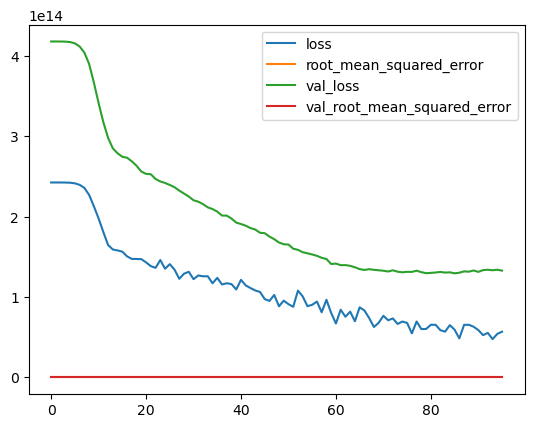

In [181]:
losses = pd.DataFrame(seqModel.history)
losses.plot();

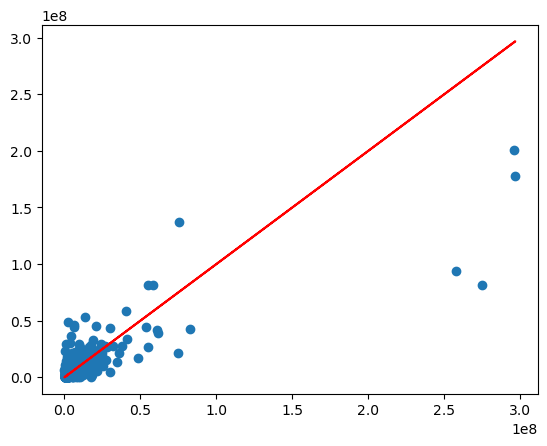

In [182]:
# Nos prédictions
plt.scatter(y_test,predictions)
# Prédictions parfaites
plt.plot(y_test,y_test,'r');

<font color='red'>4.3.10. kernel_ridge </font>

In [183]:
%%time
from sklearn import kernel_ridge

###### random forest inner loop
kernel_ridge_grid = GridSearchCV(kernel_ridge.KernelRidge(), 
                                 param_grid={'alpha':[0.1,0.2,0.5,1,2,3,4], # valeur par défaut 
                                             'kernel':['rbf','polynomial','linear'], # noyau Gaussien
                                             'degree':[1,2,3],
                                             'gamma':[0.01,0.2,0.5,1,3,5],
                                             
                                            },n_jobs=7,scoring='r2'
                                )

# random forest outer loop
do_cross_validation_upgrade(kernel_ridge_grid,X_train_reduct_scaled,y_train, print_model=True)

GridSearchCV(estimator=KernelRidge(), n_jobs=7,
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 2, 3, 4],
                         'degree': [1, 2, 3],
                         'gamma': [0.01, 0.2, 0.5, 1, 3, 5],
                         'kernel': ['rbf', 'polynomial', 'linear']},
             scoring='r2'):
	Cross-validated rmse: (-109993994996746.78 + -62516886390714.36 + -17079898053030.27) / 3 = -63196926480163.79



GridSearchCV(estimator=KernelRidge(), n_jobs=7,
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 2, 3, 4],
                         'degree': [1, 2, 3],
                         'gamma': [0.01, 0.2, 0.5, 1, 3, 5],
                         'kernel': ['rbf', 'polynomial', 'linear']},
             scoring='r2'):
	Cross-validated r2: (0.25 + 0.86 + 0.74) / 3 = 0.61

CPU times: total: 25.8 s
Wall time: 3min


#### <div class="alert alert-info"><font color='teal'> Meilleur model </font></div>

### <font color='green'>4.2.1 modelisation with best params </font>

In [46]:
print('Les meilleurs paramètres retenus ',reg_rf.best_params_)

Les meilleurs paramètres retenus  {'max_features': 'sqrt', 'n_estimators': 100}


In [47]:
bestRF = RandomForestRegressor(**reg_rf.best_params_)
bestRF.fit(X=X_train_encod_scaled,y=y_train)

RandomForestRegressor(max_features='sqrt')

Elapsed time to compute the importances: 0.015 seconds


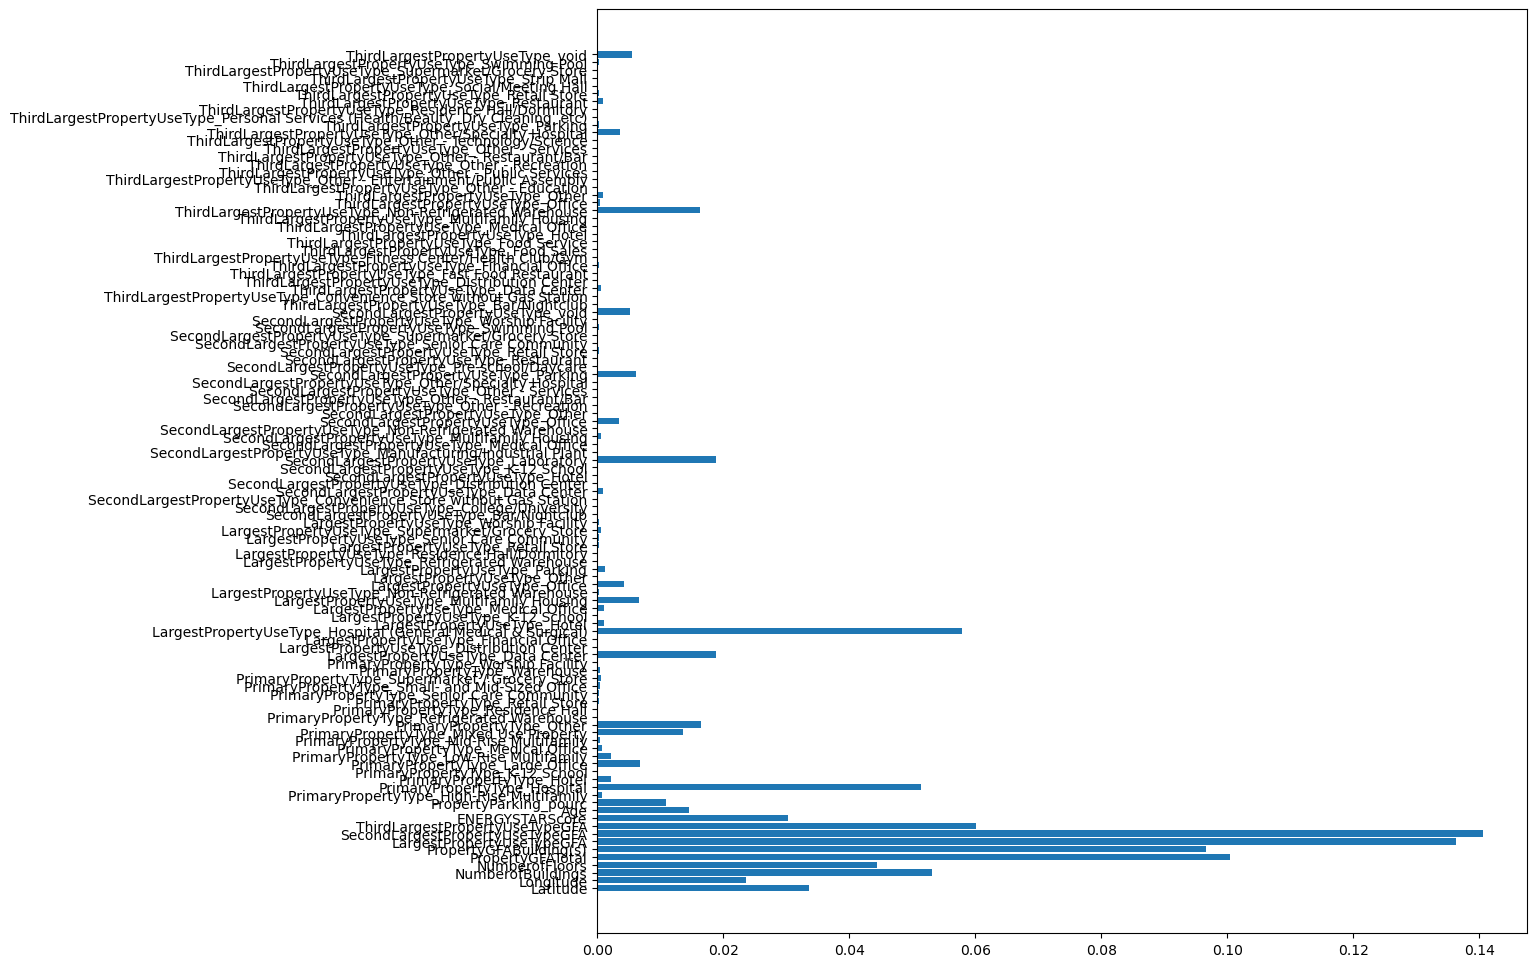

In [48]:
###################  Feature Importance  ###################
# cf https://mljar.com/blog/feature-importance-in-random-forest/
import time
import numpy as np

start_time = time.time()
importances = bestRF.feature_importances_
std = np.std([tree.feature_importances_ for tree in bestRF.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

plt.figure(figsize = (12,12))
plt.barh(Scaler.feature_names_in_, bestRF.feature_importances_);

In [ ]:
### merge modalité low imporatnce

In [132]:
result = pd.DataFrame(bestRF.feature_importances_,index=Scaler.feature_names_in_,
             columns=['Importance'])\
.sort_values(by ='Importance', ascending=False).reset_index()

result.rename({'index': 'Colonnes'}, axis='columns',inplace=True)

In [133]:
result.head(20)

,Colonnes,Importance
0,SecondLargestPropertyUseTypeGFA,0.140579
1,LargestPropertyUseTypeGFA,0.136316
2,PropertyGFATotal,0.100506
3,PropertyGFABuilding(s),0.096560
4,ThirdLargestPropertyUseTypeGFA,0.060190
5,LargestPropertyUseType_Hospital (General Medic...,0.057905
6,NumberofBuildings,0.053085
7,PrimaryPropertyType_Hospital,0.051425
8,NumberofFloors,0.044470
9,Latitude,0.033595


#### mean Importance group by categorical variable

In [134]:
result['group_col'] = result.Colonnes.str.split('_',expand=True).iloc[:,0]
result = result.merge(right=result.groupby(['group_col']).size().reset_index(),
                                on = 'group_col').rename({0:'n_group'}, axis='columns')

In [135]:
result

,Colonnes,Importance,group_col,n_group
0,SecondLargestPropertyUseTypeGFA,1.405790e-01,SecondLargestPropertyUseTypeGFA,1
1,LargestPropertyUseTypeGFA,1.363162e-01,LargestPropertyUseTypeGFA,1
2,PropertyGFATotal,1.005056e-01,PropertyGFATotal,1
3,PropertyGFABuilding(s),9.656009e-02,PropertyGFABuilding(s),1
4,ThirdLargestPropertyUseTypeGFA,6.018967e-02,ThirdLargestPropertyUseTypeGFA,1
...,...,...,...,...
103,ThirdLargestPropertyUseType_Other - Public Ser...,1.344630e-07,ThirdLargestPropertyUseType,33
104,ThirdLargestPropertyUseType_Bar/Nightclub,1.035801e-07,ThirdLargestPropertyUseType,33
105,ThirdLargestPropertyUseType_Fast Food Restaurant,4.019078e-08,ThirdLargestPropertyUseType,33
106,Age,1.454963e-02,Age,1


In [137]:
result.loc[result.n_group!=1].sort_values(by=['group_col','Importance'],ascending=[False,False])

,Colonnes,Importance,group_col,n_group
73,ThirdLargestPropertyUseType_Non-Refrigerated W...,1.628924e-02,ThirdLargestPropertyUseType,33
74,ThirdLargestPropertyUseType_void,5.499175e-03,ThirdLargestPropertyUseType,33
75,ThirdLargestPropertyUseType_Other/Specialty Ho...,3.657611e-03,ThirdLargestPropertyUseType,33
76,ThirdLargestPropertyUseType_Other,9.479631e-04,ThirdLargestPropertyUseType,33
77,ThirdLargestPropertyUseType_Restaurant,9.385388e-04,ThirdLargestPropertyUseType,33
...,...,...,...,...
18,LargestPropertyUseType_Residence Hall/Dormitory,3.919857e-05,LargestPropertyUseType,18
19,LargestPropertyUseType_K-12 School,2.903965e-05,LargestPropertyUseType,18
20,LargestPropertyUseType_Financial Office,3.616321e-06,LargestPropertyUseType,18
21,LargestPropertyUseType_Refrigerated Warehouse,1.341649e-06,LargestPropertyUseType,18


In [52]:
pd.options.display.float_format = '{:.2%}'.format
result_agg = result.groupby(['group_col']).agg({'Importance': ["min","mean","max","std"]}).round(4)
result_agg.sort_values(by=[('Importance',  'max')],ascending=False)

Importance                    
                                       min   mean    max   std
group_col                                                     
SecondLargestPropertyUseTypeGFA     14.06% 14.06% 14.06%   NaN
LargestPropertyUseTypeGFA           13.63% 13.63% 13.63%   NaN
PropertyGFATotal                    10.05% 10.05% 10.05%   NaN
PropertyGFABuilding(s)               9.66%  9.66%  9.66%   NaN
ThirdLargestPropertyUseTypeGFA       6.02%  6.02%  6.02%   NaN
LargestPropertyUseType               0.00%  0.51%  5.79% 1.39%
NumberofBuildings                    5.31%  5.31%  5.31%   NaN
PrimaryPropertyType                  0.00%  0.54%  5.14% 1.25%
NumberofFloors                       4.45%  4.45%  4.45%   NaN
Latitude                             3.36%  3.36%  3.36%   NaN
ENERGYSTARScore                      3.02%  3.02%  3.02%   NaN
Longitude                            2.37%  2.37%  2.37%   NaN
SecondLargestPropertyUseType         0.00%  0.13%  1.88% 0.38%
ThirdLargestPropertyUseType          0.00%  0.09%  1.63% 0.30%
Age                                  1.45%  1.45%  1.45%   NaN
PropertyParking                      1.10%  1.10%  1.10%   NaN

In [53]:
pd.reset_option('^display.', silent=True)

<AxesSubplot:xlabel='group_col'>

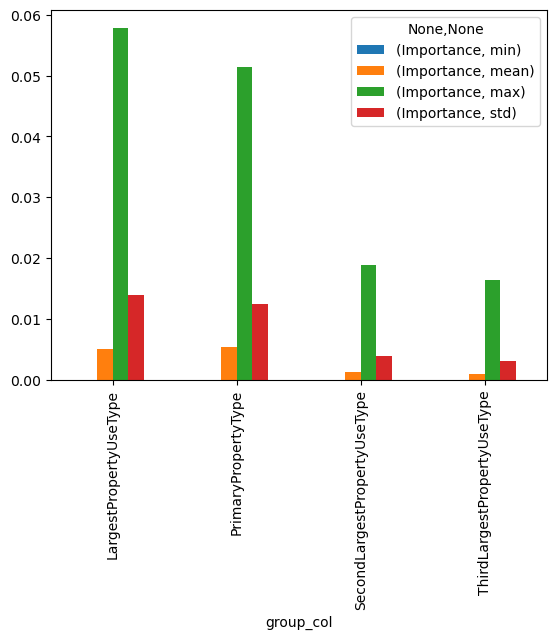

In [54]:
result_agg.loc[~result_agg.Importance["std"].isna()].plot(kind = 'bar')

In [55]:
# les colonnes BuildingType, Neighborhood, ZipCode, Longitude, Latitude, Age, PropertyGFAParking ne sont pas importantes

In [56]:
%%time
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor( #max_features=p/3 #{“sqrt”, “log2”, None}, int or float, default=”sqrt”
                                 )

p = X_train_encod.shape[1]#nombre de variable

inner_cv = KFold(n_splits=5,shuffle=True,random_state=0)
outer_cv = KFold(n_splits=5,shuffle=True,random_state=1)

#parametre à tester
params_grid = {
    'n_estimators':[100,200,500], # A modifier
    'max_features':['sqrt', 'log2']
}

# Boucle interne
model = GridSearchCV(estimator = estimator, 
                      param_grid=params_grid,
                      cv=inner_cv, 
                      n_jobs=4,
                      scoring='neg_mean_squared_error') #'accuracy' si y est categorielle


# Boucle externe
nested_score = cross_val_score(model,
                               X=X_train_encod_scaled,
                               y=y_train,
                               cv=outer_cv,
                               n_jobs=1,
                               scoring='neg_mean_squared_error')#'accuracy' si y est categorielle

nested_score.mean()

#model2.fit(X_train_scaled,y_train)
#non_nested_score = model2.best_score_

CPU times: total: 5.62 s
Wall time: 40.3 s


-192278151357827.1

##### <font color='green'>  Résultat des differents tests effectué </font>

|Encodage|Passage au log|ENERYSCORE|Resultat R2|
|-----|-----|-----|-----|
avec|sans|sans|56,54%|
avec|sans|avec|63,33%|
avec|avec|avec|42,34%|
avec|avec|sans|46,58%|
sans|sans|sans|50,67%|
sans|sans|avec|61,71%|


<div class="alert alert-info"> 
    Résultat des differents tests effectué </br> 
    Sans passage au log </br>
    Avec encodage </br>
    </div>

### <a name="C43"><font color='green'>4.3 Feature Selection</font></a> 

<font color='green'> RFE : Élimination récursive des fonctionnalités </font>

In [107]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

min_features_to_select = 1  # Minimum number of features to consider
reg = RandomForestRegressor()
cv = KFold(5)

rfecv = RFECV(
    estimator=reg,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_log_error",
    min_features_to_select=min_features_to_select,
    n_jobs=7,
)
rfecv.fit(X_train_encod_scaled, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 82
CPU times: total: 39.3 s
Wall time: 3min 9s


In [108]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

min_features_to_select = 1  # Minimum number of features to consider
reg = RandomForestRegressor()
cv = KFold(5)

rfecv = RFECV(
    estimator=reg,
    step=1,
    cv=cv,
    scoring="neg_root_mean_squared_error",
    min_features_to_select=min_features_to_select,
    n_jobs=7,
)
rfecv.fit(X_train_encod_scaled, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 94
CPU times: total: 23 s
Wall time: 2min 52s


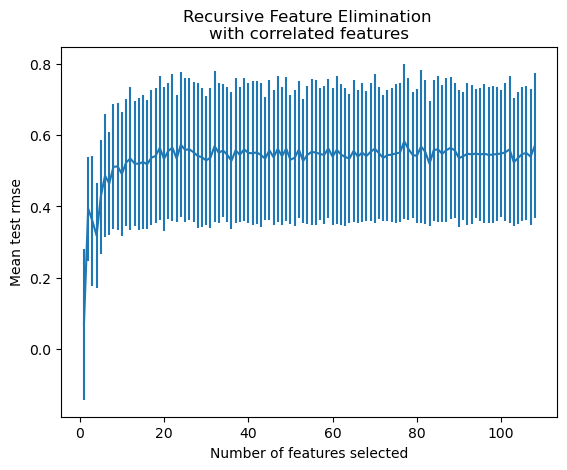

CPU times: total: 125 ms
Wall time: 110 ms


In [106]:
%%time
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test rmse")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

<font color='green'> Model-based and sequential feature selection </font>

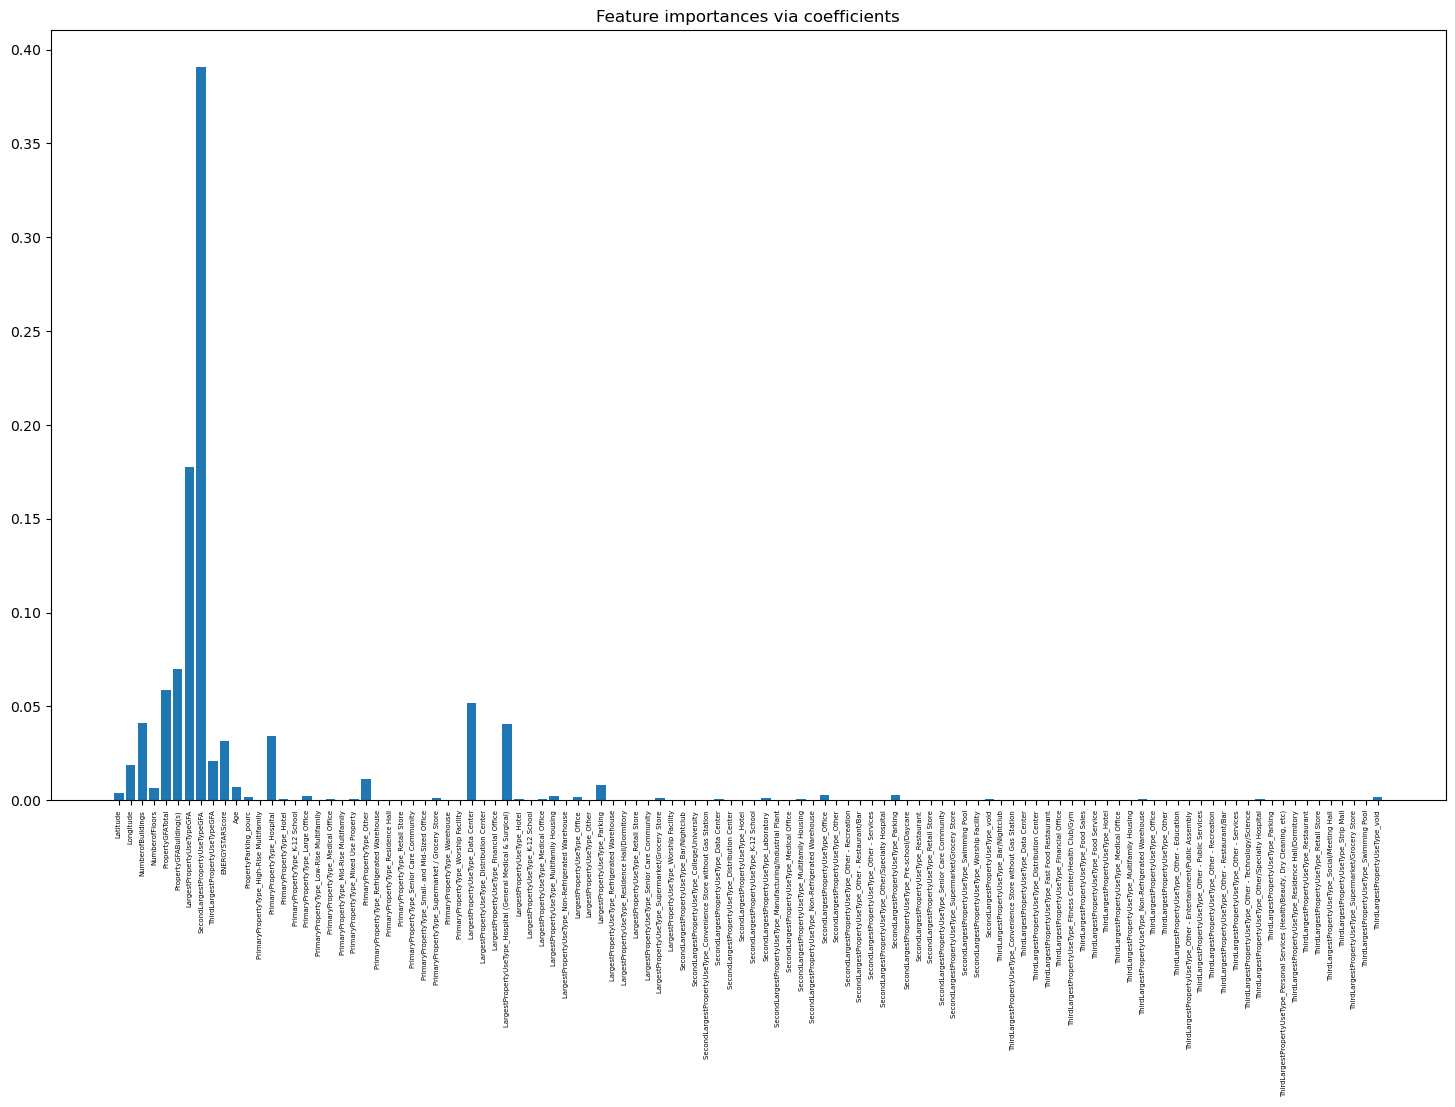

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train_encod_scaled, y_train)
importance = np.abs(reg.feature_importances_)
feature_names = np.array(Scaler.feature_names_in_)

plt.figure(figsize=(18,10))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation=90,size=5)
plt.show()

In [99]:
### Sélection de fonctionnalités en fonction de leur importance 
from sklearn.feature_selection import SelectFromModel
from time import time

# remain 2 features
threshold = np.sort(importance)[-3] + 0.01

tic = time()
sfm = SelectFromModel(reg, threshold=threshold).fit(X_train_encod_scaled, y_train)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['LargestPropertyUseTypeGFA' 'SecondLargestPropertyUseTypeGFA']
Done in 2.583s


In [104]:
### Sélection de fonctions avec Sequential Feature Selection 
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    reg, n_features_to_select=17, direction="forward"
).fit(X_train_encod_scaled, y_train)
toc_fwd = time()

#tic_bwd = time()
#sfs_backward = SequentialFeatureSelector(
#    reg, n_features_to_select=17, direction="backward"
#).fit(X_train_encod_scaled, y_train)
#toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
#print(
#    "Features selected by backward sequential selection: "
#    f"{feature_names[sfs_backward.get_support()]}"
#)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

KeyboardInterrupt: 

In [ ]:
def create_data(Field):
    return np.c_(np.ones(len(Field)),Field)

In [68]:
FeatureImporatnce = dict()

In [67]:
for feature,Field in zip(Scaler.feature_names_in_,X_test_encod_scaled):
    
    # create dict contains feature imporance
    FeatureImporatnce = dict()
    
    # concatenate  one + feature in a new dataset xx
    xx = np.c_(np.ones(len(Field)),Field)
    
    # compute feature importance with randomforest
    rf_estimator = RandomForestRegressor()
    rf_estimator.fit(X_train_encod_scaled, y_train)
    rf_estimator.feature_importances_
    
    FeatureImporatnce[feature] = rf_estimator.feature_importances_
    print(feature)

Latitude
Longitude
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFABuilding(s)
LargestPropertyUseTypeGFA
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseTypeGFA
ENERGYSTARScore
Age
PropertyParking_pourc
PrimaryPropertyType_High-Rise Multifamily
PrimaryPropertyType_Hospital
PrimaryPropertyType_Hotel
PrimaryPropertyType_K-12 School
PrimaryPropertyType_Large Office
PrimaryPropertyType_Low-Rise Multifamily
PrimaryPropertyType_Medical Office
PrimaryPropertyType_Mid-Rise Multifamily
PrimaryPropertyType_Mixed Use Property
PrimaryPropertyType_Other
PrimaryPropertyType_Refrigerated Warehouse
PrimaryPropertyType_Residence Hall
PrimaryPropertyType_Retail Store
PrimaryPropertyType_Senior Care Community
PrimaryPropertyType_Small- and Mid-Sized Office
PrimaryPropertyType_Supermarket / Grocery Store
PrimaryPropertyType_Warehouse
PrimaryPropertyType_Worship Facility
LargestPropertyUseType_Data Center
LargestPropertyUseType_Distribution Center
LargestPropertyUseType_Financial Office

### <a name="C44"><font color='green'>4.4 Model Selection</font></a> 

In [114]:
### Parmi tous les nested_score calculés choisir le modèle qui propose le meilleur score
### Ce sera notre erreur de généralisation

In [115]:
def resultize(grid):
    """make a fancy df from grid.cv_results"""
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if "split" not in i]
    res = res[cols]
    res = res.sort_values("rank_test_score")
    return res

In [118]:
resultize(grid).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
4,98.91%,3.48%,4.92%,0.60%,log2,200,"{'max_features': 'log2', 'n_estimators': 200}",-20673222192407976.00%,15502858347997606.00%,1,-2316546653450508.00%,546009886106680.50%
5,206.29%,2.87%,11.58%,0.68%,log2,500,"{'max_features': 'log2', 'n_estimators': 500}",-20947179900820412.00%,15507903576530794.00%,2,-2662337200086445.50%,688605038310624.25%
1,97.49%,3.34%,4.43%,1.23%,sqrt,200,"{'max_features': 'sqrt', 'n_estimators': 200}",-21066505129758840.00%,15861689219250556.00%,3,-2672375744171526.00%,1108810107118647.88%
2,244.20%,8.57%,14.75%,0.61%,sqrt,500,"{'max_features': 'sqrt', 'n_estimators': 500}",-21069933620141080.00%,15531904564678828.00%,4,-2513332792223978.00%,644493648435804.00%
0,43.01%,1.01%,3.06%,0.25%,sqrt,100,"{'max_features': 'sqrt', 'n_estimators': 100}",-21328474108499848.00%,15918324269919678.00%,5,-2423760010529167.00%,716782311395880.00%


In [119]:
best_params = grid.best_params_

### <a name="C45"><font color='green'>4.5 Fit best Model and get test score</font></a> 

In [125]:
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train_encod_scaled2, y_train)
y_pred = estimator.predict(X_test_encod_scaled2)

In [126]:
def score(estimator):
    """Compute and print train score and test score"""
    tr_score = estimator.score(X_train_encod_scaled2,y_train).round(4)
    te_score = estimator.score(X_test_encod_scaled2,y_test).round(4)
    return tr_score,te_score

In [127]:
score(estimator)

(0.9383, 0.6699)

In [128]:
# y numerique

In [129]:
from sklearn import metrics
print( 'Le score R2 est {:%} et le rmse {}'.format(metrics.r2_score(y_test, y_pred),
metrics.mean_squared_error(y_test, y_pred)) )

Le score R2 est 66.994404% et le rmse 18387747184866.156


### <a name="C46"><font color='green'>4.6 Sauvegarde Modele</font></a> 

<hr>

# <a name="C5"><font color='red'>**Partie 5 : Benchmark**</font></a> 

In [75]:
from sklearn.model_selection import cross_validate
cross_validate(LinearRegression(), X_train_reduct_scaled, y_train, scoring=('r2', 'neg_mean_squared_log_error'), cv=outer_cv)

NameError: name 'outer_cv' is not defined

In [74]:
from sklearn.model_selection import cross_validate

def do_cross_validation_upgrade(clf,X,y, print_model=False):
    cv = cross_validate(clf, X, y, scoring=('r2', 'neg_mean_squared_log_error'), cv=outer_cv)
    
    scores_neg_mean_squared_error = ' + '.join(f'{s:.2f}' for s in cv["test_neg_mean_squared_error"])
    scores_r2 = ' + '.join(f'{s:.2f}' for s in cv["test_r2"])
    
    mean_r2 = cv["test_r2"].mean()
    mean_nRMSE = cv["test_neg_mean_squared_error"].mean()
    
    msg_r2 = f'Cross-validated rmse: ({scores_r2}) / 3 = {mean_r2:.2f}'
    msg_nRMSE = f'Cross-validated rmse: ({scores_neg_mean_squared_error}) / 3 = {mean_nRMSE:.2f}'
    
    if print_model:
        msg_nRMSE = f'{clf}:\n\t{msg_nRMSE}\n'
        msg_r2 = f'{clf}:\n\t{msg_r2}\n'
    
    print(msg_nRMSE)
    print('\n')
    print(msg_r2)
    
def do_cross_validation(clf,X,y, print_model=False):
    cv = cross_validate(clf, X, y, scoring=('r2', 'neg_mean_squared_log_error'), cv=outer_cv)
    scores = ' + '.join(f'{s:.2f}' for s in cv["test_score"])
    mean_ = cv["test_score"].mean()
    msg = f'Cross-validated rmse: ({scores}) / 3 = {mean_:.2f}'
    
    if print_model:
        msg = f'{clf}:\n\t{msg}\n'
    
    print(msg)

In [75]:
# Init inner and outer loop
inner_cv = KFold(n_splits=3,shuffle=True,random_state=0)
outer_cv = KFold(n_splits=3,shuffle=True,random_state=1)

<font color='red'> 5.0. Linear Model</font>

In [ ]:
%%time
from sklearn.linear_model import LinearRegression

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
lm_grid = GridSearchCV(LinearRegression(n_jobs= 7), 
                       param_grid={'fit_intercept': [True,False],
                                   'positive' : [True,False]
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_log_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(lm_grid,X_train_encod_scaled2, y_train, print_model=False)

In [ ]:
%%time
from sklearn.linear_model import Ridge

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
Ridge_grid = GridSearchCV(Ridge(n_jobs= 7,max_iter=20000), 
                       param_grid={'fit_intercept': [True,False],
                                   'alpha':[0.1, 1.0, 10.0,20,50,100],
                                   'solver':[ "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
                                   
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_log_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(Ridge_grid,X_train_encod_scaled2, y_train, print_model=False)

In [ ]:
%%time
from sklearn.linear_model import Lasso

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
Lasso_grid = GridSearchCV(Lasso(n_jobs= 7,max_iter=20000), 
                       param_grid={'fit_intercept': [True,False],
                                   'alpha':[0.1, 1.0, 10.0,20,50,100,500],
                                   'positive' : [True,False],
                                   'selection':['cyclic', 'random']
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_log_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(Lasso_grid,X_train_encod_scaled2, y_train, print_model=False)

In [ ]:
%%time
from sklearn.linear_model import ElasticNet

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
ElasticNet_grid = GridSearchCV(ElasticNet(n_jobs= 7,max_iter=20000), 
                       param_grid={'fit_intercept': [True,False],
                                   'alpha':[0.1, 1.0, 10.0,20,50,100,500],
                                   'positive' : [True,False],
                                   'l1_ratio':[0.01,0.1,0.2,0.5,0.7,0.9],
                                   'selection':['cyclic', 'random']
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_log_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(ElasticNet_grid,X_train_encod_scaled2, y_train, print_model=False)

<font color='red'> 5.1. RandomForestRegressor</font>

In [132]:
%%time
from sklearn.ensemble import RandomForestRegressor

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
rf_grid = GridSearchCV(RandomForestRegressor(random_state=0,n_jobs= 7), 
                       param_grid={'n_estimators': [100,200,500,750],
                                   'criterion' : ['squared_error', 'absolute_error', 'poisson'],
                                   'max_depth' : [None,3],
                                   'max_features' : [1.0, 'sqrt', 'log2',int(X_train_encod_scaled.shape[1]/3)],
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_log_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(rf_grid,X_train_encod_scaled2, y_train, print_model=False)

Cross-validated rmse: (-22975620500524.92 + -214588000023036.06 + -343717530545274.19) / 3 = -193760383689611.72
CPU times: total: 3min 44s
Wall time: 7min 41s


In [56]:
rf_grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 54,
 'n_estimators': 500}

<font color='red'>5.2. BaggingRegressor</font>

In [146]:
%%time
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor

###### BaggingRegressor inner loop
bagg_grid = GridSearchCV(BaggingRegressor(random_state=0,n_jobs = 2,oob_score=False),param_grid={'n_estimators': [5,100,200, 500]},
                         cv=inner_cv,n_jobs= 3,scoring='neg_mean_squared_log_error')
# BaggingRegressor outer loop
do_cross_validation_upgrade(bagg_grid,X_train_encod_scaled2, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=BaggingRegressor(n_jobs=2, random_state=0), n_jobs=3,
             param_grid={'n_estimators': [5, 100, 200, 500]},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-31133326591850.47 + -229940543745223.50 + -328446941943931.81) / 3 = -196506937427001.91



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=BaggingRegressor(n_jobs=2, random_state=0), n_jobs=3,
             param_grid={'n_estimators': [5, 100, 200, 500]},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (0.71 + 0.56 + 0.47) / 3 = 0.58

CPU times: total: 734 ms
Wall time: 26.2 s


<font color='red'>5.3.AdaBoostRegressor</font>

In [147]:
%%time
from sklearn.ensemble import AdaBoostRegressor

###### AdaBoostRegressor inner loop
Ada_grid = GridSearchCV(AdaBoostRegressor(random_state=0), 
                         param_grid={'n_estimators': [5,50,100,200, 500],
                                    "loss":["linear", "square", "exponential"],
                                     'learning_rate': [0.1,0.2,0.5,1]
                                    },cv=inner_cv,n_jobs= 7,scoring='neg_mean_squared_log_error')
                        
# AdaBoostRegressor outer loop
do_cross_validation_upgrade(Ada_grid,X_train_encod_scaled2, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostRegressor(random_state=0), n_jobs=7,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [5, 50, 100, 200, 500]},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-63621336085145.06 + -217692552667736.03 + -447153194292424.00) / 3 = -242822361015101.72



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostRegressor(random_state=0), n_jobs=7,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [5, 50, 100, 200, 500]},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (0.41 + 0.58 + 0.27) / 3 = 0.42

CPU times: total: 1.52 s
Wall time: 37.9 s


<font color='red'>5.4. Support Vector Machine Regressor RBF</font>

In [148]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-300,300,5)
params_grid_rbf = { 'gamma': gamma_to_test,
                  'C' : [0.2, 0.5, 1.0, 5, 20]
                  }

###### svc inner loop
svr_rbf_grid = GridSearchCV(estimator=SVR(kernel='rbf'), 
                      param_grid = params_grid_rbf,
                      cv=inner_cv, 
                      n_jobs=4,scoring='neg_mean_squared_log_error')
# svc outer loop
do_cross_validation_upgrade(svr_rbf_grid,X_train_encod_scaled2, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(), n_jobs=4,
             param_grid={'C': [0.2, 0.5, 1.0, 5, 20],
                         'gamma': array([1.e-300, 1.e-150, 1.e+000, 1.e+150, 1.e+300])},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-117582496056656.55 + -548090417745335.06 + -628627052459090.25) / 3 = -431433322087027.31



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(), n_jobs=4,
             param_grid={'C': [0.2, 0.5, 1.0, 5, 20],
                         'gamma': array([1.e-300, 1.e-150, 1.e+000, 1.e+150, 1.e+300])},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-0.08 + -0.05 + -0.02) / 3 = -0.05

CPU times: total: 1.47 s
Wall time: 8.66 s


<font color='red'>5.5. Support Vector Machine Regressor sigmoid</font>

In [149]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-100,300,6)
params_grid_sigmoid = {
    'coef0':[0,0.5,500],
    'gamma': gamma_to_test
}

###### svc inner loop
svr_sigmoid_grid = GridSearchCV(estimator=SVR(kernel='sigmoid'), 
                      param_grid=params_grid_sigmoid,
                      cv=inner_cv, 
                      n_jobs = 7 ,scoring='neg_mean_squared_log_error')
# svc outer loop
do_cross_validation_upgrade(svr_sigmoid_grid,X_train_encod_scaled2, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='sigmoid'), n_jobs=7,
             param_grid={'coef0': [0, 0.5, 500],
                         'gamma': array([1.e-100, 1.e-020, 1.e+060, 1.e+140, 1.e+220, 1.e+300])},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-117580274899081.08 + -548086844268261.50 + -628624988513697.88) / 3 = -431430702560346.81



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='sigmoid'), n_jobs=7,
             param_grid={'coef0': [0, 0.5, 500],
                         'gamma': array([1.e-100, 1.e-020, 1.e+060, 1.e+140, 1.e+220, 1.e+300])},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-0.08 + -0.05 + -0.02) / 3 = -0.05

CPU times: total: 609 ms
Wall time: 5.76 s


<font color='red'>5.6. Support Vector Machine Regressor linear</font>

In [150]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-3,3,5)
params_grid_linear = { 'C':[0.5,1,2] }

###### svc inner loop
svr_rbf_linear = GridSearchCV(estimator=SVR(kernel='linear'), 
                      param_grid=params_grid_linear,
                      cv=inner_cv, 
                      n_jobs=7,scoring='neg_mean_squared_log_error')
# svc outer loop
do_cross_validation_upgrade(svr_rbf_linear,X_train_encod_scaled2, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='linear'), n_jobs=7,
             param_grid={'C': [0.5, 1, 2]}, scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-117507009990773.72 + -547928368833295.62 + -628487711097087.12) / 3 = -431307696640385.50



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='linear'), n_jobs=7,
             param_grid={'C': [0.5, 1, 2]}, scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-0.08 + -0.04 + -0.02) / 3 = -0.05

CPU times: total: 250 ms
Wall time: 493 ms


In [150]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-3,3,5)
params_grid_all = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

###### svc inner loop
svr_all = GridSearchCV(estimator=SVR(), 
                              param_grid=params_grid_all,
                              cv=inner_cv, 
                              n_jobs=7,scoring='neg_mean_squared_log_error')
# svc outer loop
do_cross_validation_upgrade(svr_all,X_train_encod_scaled2, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='linear'), n_jobs=7,
             param_grid={'C': [0.5, 1, 2]}, scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-117507009990773.72 + -547928368833295.62 + -628487711097087.12) / 3 = -431307696640385.50



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='linear'), n_jobs=7,
             param_grid={'C': [0.5, 1, 2]}, scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-0.08 + -0.04 + -0.02) / 3 = -0.05

CPU times: total: 250 ms
Wall time: 493 ms


<font color='red'>5.7. Gradient Boosting Regressor </font>

In [151]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

params_grid_gb = {'n_estimators': [5,100,200, 500],
                  'loss' : ['squared_error', 'absolute_error', 'huber'],
                  'learning_rate' : [0.1,0.2,0.5,1],
                 }

###### Gradient Boosting Regressor inner loop
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=0), 
                       param_grid = params_grid_gb,
                       cv=inner_cv, 
                       n_jobs=4,
                       scoring='neg_mean_squared_error')

# Gradient Boosting Regressor outer loop
do_cross_validation_upgrade(gb_grid,X_train_encod_scaled2, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=0), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber'],
                         'n_estimators': [5, 100, 200, 500]},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (-30976974629439.95 + -187243249417616.53 + -268371122182950.31) / 3 = -162197115410002.28



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=0), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber'],
                         'n_estimators': [5, 100, 200, 500]},
             scoring='neg_mean_squared_error'):
	Cross-validated rmse: (0.71 + 0.64 + 0.56) / 3 = 0.64

CPU times: total: 8.42 s
Wall time: 1min 19

<font color='red'>5.8. XGBoost Regressor </font>

In [152]:
%%time
# https://xgboost.readthedocs.io/en/latest/parameter.html
import xgboost as xgb
from sklearn.metrics import mean_squared_error

params_grid_xgboost =  {'max_depth': [2,3, 4],
                        'n_estimators': [50, 100],
                        'objective' :['reg:squarederror','reg:pseudohubererror','reg:gamma'], 
                        'learning_rate' : [0.1,0.2,0.5,0.9],
                        'alpha' : [0,0.1,0.2,1,5,10]
                       }
###### xgboost inner loop
xgboost_grid = GridSearchCV(estimator = xgb.XGBRegressor(), 
                            param_grid = params_grid_xgboost,
                            #early_stopping_rounds=10,
                            n_jobs=7,scoring='neg_mean_squared_log_error',
                            cv=inner_cv)
# xgboost outer loop
do_cross_validation_upgrade(xgboost_grid,X_train_encod_scaled2, y_train, print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=7,
          

<font color='red'>5.9. Artificial Neural Network </font>

In [155]:
X_train_encod_scaled.shape,X_train_encod_scaled2.shape

((1673, 108), (1673, 26))

In [187]:
%%time
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

#Nous allons créer notre premier réseau de neurones. 

# earlystopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

#inputshape
p_input = X_train_encod_scaled.shape[1]

def initialize_model():
    
    #Nous utilisons la fonction Sequential() qui est approprié pour notre problème. Nous ne développerons pas ici mais
    #vous pouvez vous référer à la documentation de la bibliothèque Keras: https://keras.io/guides/sequential_model/
    model = models.Sequential()
    #On indique à notre modèle la dimension des données d'entrées qui correspond au nombre de colonnes de X_train
    model.add(keras.Input(shape=(p_input)))  #140
    
    model.add(layers.Dense(80, input_dim=2, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(40, input_dim=2, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    #Nous ajoutons une seconde couche car nous sommes dans un problème non linéaire comme dit dans le cours
    model.add(layers.Dense(1))
    
    #Ici, nous pouvons ajouter des paramètres à notre modèle. Il faut juste retenir que "accuracy" permet d'avoir
    #la précision de notre modèle et est particulièrement indiqué pour les problèmes de classification. 
    model.compile(metrics=[keras.metrics.RootMeanSquaredError()],
                  loss='mse',
                  optimizer='adam')
    
    return model

model = initialize_model()

seqModel = model.fit(
    x=X_, #r2: 0.50
    y=y_train.values,
    validation_data=(X_test_encod_scaled,y_test.values),
    batch_size=128,epochs=10000,callbacks=[es])

Epoch 1/10000
14/14 [==============================] - 0s 9ms/step - loss: 449574493749248.0000 - root_mean_squared_error: 21203172.0000 - val_loss: 74224131637248.0000 - val_root_mean_squared_error: 8615343.0000
Epoch 2/10000
14/14 [==============================] - 0s 3ms/step - loss: 449574493749248.0000 - root_mean_squared_error: 21203172.0000 - val_loss: 74224114860032.0000 - val_root_mean_squared_error: 8615342.0000
Epoch 3/10000
14/14 [==============================] - 0s 2ms/step - loss: 449574393085952.0000 - root_mean_squared_error: 21203170.0000 - val_loss: 74224089694208.0000 - val_root_mean_squared_error: 8615340.0000
Epoch 4/10000
14/14 [==============================] - 0s 2ms/step - loss: 449574292422656.0000 - root_mean_squared_error: 21203168.0000 - val_loss: 74224056139776.0000 - val_root_mean_squared_error: 8615338.0000
Epoch 5/10000
14/14 [==============================] - 0s 2ms/step - loss: 449574225313792.0000 - root_mean_squared_error: 21203166.0000 - val_loss:

14/14 [==============================] - 0s 2ms/step - loss: 448453607948288.0000 - root_mean_squared_error: 21176724.0000 - val_loss: 73640326463488.0000 - val_root_mean_squared_error: 8581394.0000
Epoch 78/10000
14/14 [==============================] - 0s 2ms/step - loss: 448383814729728.0000 - root_mean_squared_error: 21175076.0000 - val_loss: 73619849871360.0000 - val_root_mean_squared_error: 8580201.0000
Epoch 79/10000
14/14 [==============================] - 0s 2ms/step - loss: 448376432754688.0000 - root_mean_squared_error: 21174902.0000 - val_loss: 73596714090496.0000 - val_root_mean_squared_error: 8578853.0000
Epoch 80/10000
14/14 [==============================] - 0s 2ms/step - loss: 448248959467520.0000 - root_mean_squared_error: 21171890.0000 - val_loss: 73568922632192.0000 - val_root_mean_squared_error: 8577233.0000
Epoch 81/10000
14/14 [==============================] - 0s 2ms/step - loss: 448191312953344.0000 - root_mean_squared_error: 21170530.0000 - val_loss: 735453925

14/14 [==============================] - 0s 2ms/step - loss: 442559436423168.0000 - root_mean_squared_error: 21037096.0000 - val_loss: 70666069999616.0000 - val_root_mean_squared_error: 8406311.0000
Epoch 154/10000
14/14 [==============================] - 0s 2ms/step - loss: 442308986142720.0000 - root_mean_squared_error: 21031144.0000 - val_loss: 70623405539328.0000 - val_root_mean_squared_error: 8403773.0000
Epoch 155/10000
14/14 [==============================] - 0s 2ms/step - loss: 442307375529984.0000 - root_mean_squared_error: 21031104.0000 - val_loss: 70584272683008.0000 - val_root_mean_squared_error: 8401445.0000
Epoch 156/10000
14/14 [==============================] - 0s 2ms/step - loss: 442090513235968.0000 - root_mean_squared_error: 21025948.0000 - val_loss: 70541801160704.0000 - val_root_mean_squared_error: 8398917.0000
Epoch 157/10000
14/14 [==============================] - 0s 2ms/step - loss: 442038268985344.0000 - root_mean_squared_error: 21024706.0000 - val_loss: 70493

14/14 [==============================] - 0s 2ms/step - loss: 431608712658944.0000 - root_mean_squared_error: 20775194.0000 - val_loss: 65527766581248.0000 - val_root_mean_squared_error: 8094922.5000
Epoch 230/10000
14/14 [==============================] - 0s 2ms/step - loss: 430983929135104.0000 - root_mean_squared_error: 20760152.0000 - val_loss: 65424343433216.0000 - val_root_mean_squared_error: 8088531.5000
Epoch 231/10000
14/14 [==============================] - 0s 2ms/step - loss: 430839812849664.0000 - root_mean_squared_error: 20756682.0000 - val_loss: 65327425650688.0000 - val_root_mean_squared_error: 8082538.5000
Epoch 232/10000
14/14 [==============================] - 0s 2ms/step - loss: 431431478149120.0000 - root_mean_squared_error: 20770928.0000 - val_loss: 65233666179072.0000 - val_root_mean_squared_error: 8076736.0000
Epoch 233/10000
14/14 [==============================] - 0s 2ms/step - loss: 430678348922880.0000 - root_mean_squared_error: 20752792.0000 - val_loss: 65139

14/14 [==============================] - 0s 2ms/step - loss: 413028650582016.0000 - root_mean_squared_error: 20323106.0000 - val_loss: 56821238726656.0000 - val_root_mean_squared_error: 7537986.5000
Epoch 306/10000
14/14 [==============================] - 0s 2ms/step - loss: 413381307662336.0000 - root_mean_squared_error: 20331780.0000 - val_loss: 56697859080192.0000 - val_root_mean_squared_error: 7529798.0000
Epoch 307/10000
14/14 [==============================] - 0s 2ms/step - loss: 410176725188608.0000 - root_mean_squared_error: 20252820.0000 - val_loss: 56563444219904.0000 - val_root_mean_squared_error: 7520867.5000
Epoch 308/10000
14/14 [==============================] - 0s 2ms/step - loss: 409807190228992.0000 - root_mean_squared_error: 20243696.0000 - val_loss: 56430803550208.0000 - val_root_mean_squared_error: 7512044.0000
Epoch 309/10000
14/14 [==============================] - 0s 2ms/step - loss: 411102626185216.0000 - root_mean_squared_error: 20275666.0000 - val_loss: 56301

14/14 [==============================] - 0s 2ms/step - loss: 387739279163392.0000 - root_mean_squared_error: 19691096.0000 - val_loss: 46860894994432.0000 - val_root_mean_squared_error: 6845502.0000
Epoch 382/10000
14/14 [==============================] - 0s 2ms/step - loss: 388987940241408.0000 - root_mean_squared_error: 19722778.0000 - val_loss: 46738878496768.0000 - val_root_mean_squared_error: 6836584.0000
Epoch 383/10000
14/14 [==============================] - 0s 2ms/step - loss: 388341447000064.0000 - root_mean_squared_error: 19706380.0000 - val_loss: 46631256850432.0000 - val_root_mean_squared_error: 6828708.5000
Epoch 384/10000
14/14 [==============================] - 0s 2ms/step - loss: 386262951264256.0000 - root_mean_squared_error: 19653574.0000 - val_loss: 46518287466496.0000 - val_root_mean_squared_error: 6820431.5000
Epoch 385/10000
14/14 [==============================] - 0s 2ms/step - loss: 385236756070400.0000 - root_mean_squared_error: 19627450.0000 - val_loss: 46410

14/14 [==============================] - 0s 2ms/step - loss: 363993914933248.0000 - root_mean_squared_error: 19078624.0000 - val_loss: 37898963386368.0000 - val_root_mean_squared_error: 6156213.5000
Epoch 458/10000
14/14 [==============================] - 0s 2ms/step - loss: 362952083374080.0000 - root_mean_squared_error: 19051302.0000 - val_loss: 37781673869312.0000 - val_root_mean_squared_error: 6146680.0000
Epoch 459/10000
14/14 [==============================] - 0s 2ms/step - loss: 364202589945856.0000 - root_mean_squared_error: 19084092.0000 - val_loss: 37669920833536.0000 - val_root_mean_squared_error: 6137582.5000
Epoch 460/10000
14/14 [==============================] - 0s 2ms/step - loss: 360883049988096.0000 - root_mean_squared_error: 18996922.0000 - val_loss: 37552727785472.0000 - val_root_mean_squared_error: 6128028.0000
Epoch 461/10000
14/14 [==============================] - 0s 2ms/step - loss: 365499267416064.0000 - root_mean_squared_error: 19118036.0000 - val_loss: 37439

14/14 [==============================] - 0s 2ms/step - loss: 332309202993152.0000 - root_mean_squared_error: 18229350.0000 - val_loss: 29922877767680.0000 - val_root_mean_squared_error: 5470181.0000
Epoch 534/10000
14/14 [==============================] - 0s 2ms/step - loss: 335314505695232.0000 - root_mean_squared_error: 18311594.0000 - val_loss: 29841881563136.0000 - val_root_mean_squared_error: 5462772.5000
Epoch 535/10000
14/14 [==============================] - 0s 2ms/step - loss: 333919949946880.0000 - root_mean_squared_error: 18273476.0000 - val_loss: 29764853170176.0000 - val_root_mean_squared_error: 5455717.5000
Epoch 536/10000
14/14 [==============================] - 0s 2ms/step - loss: 334344916828160.0000 - root_mean_squared_error: 18285100.0000 - val_loss: 29676762300416.0000 - val_root_mean_squared_error: 5447638.0000
Epoch 537/10000
14/14 [==============================] - 0s 2ms/step - loss: 336079949398016.0000 - root_mean_squared_error: 18332484.0000 - val_loss: 29600

14/14 [==============================] - 0s 2ms/step - loss: 316973216956416.0000 - root_mean_squared_error: 17803742.0000 - val_loss: 25017372901376.0000 - val_root_mean_squared_error: 5001737.0000
Epoch 610/10000
14/14 [==============================] - 0s 2ms/step - loss: 310001277075456.0000 - root_mean_squared_error: 17606854.0000 - val_loss: 24961246822400.0000 - val_root_mean_squared_error: 4996123.0000
Epoch 611/10000
14/14 [==============================] - 0s 2ms/step - loss: 312035313188864.0000 - root_mean_squared_error: 17664522.0000 - val_loss: 24918133571584.0000 - val_root_mean_squared_error: 4991806.5000
Epoch 612/10000
14/14 [==============================] - 0s 2ms/step - loss: 311330435235840.0000 - root_mean_squared_error: 17644558.0000 - val_loss: 24870616301568.0000 - val_root_mean_squared_error: 4987045.0000
Epoch 613/10000
14/14 [==============================] - 0s 2ms/step - loss: 311706244874240.0000 - root_mean_squared_error: 17655204.0000 - val_loss: 24818

14/14 [==============================] - 0s 2ms/step - loss: 296686777794560.0000 - root_mean_squared_error: 17224598.0000 - val_loss: 22805802385408.0000 - val_root_mean_squared_error: 4775542.0000
Epoch 686/10000
14/14 [==============================] - 0s 2ms/step - loss: 292539047346176.0000 - root_mean_squared_error: 17103772.0000 - val_loss: 22790195380224.0000 - val_root_mean_squared_error: 4773908.0000
Epoch 687/10000
14/14 [==============================] - 0s 2ms/step - loss: 289791442681856.0000 - root_mean_squared_error: 17023262.0000 - val_loss: 22772648509440.0000 - val_root_mean_squared_error: 4772069.5000
Epoch 688/10000
14/14 [==============================] - 0s 2ms/step - loss: 282080768425984.0000 - root_mean_squared_error: 16795260.0000 - val_loss: 22744171282432.0000 - val_root_mean_squared_error: 4769085.0000
Epoch 689/10000
14/14 [==============================] - 0s 2ms/step - loss: 299945550675968.0000 - root_mean_squared_error: 17318936.0000 - val_loss: 22724

14/14 [==============================] - 0s 2ms/step - loss: 287005955063808.0000 - root_mean_squared_error: 16941250.0000 - val_loss: 22134325772288.0000 - val_root_mean_squared_error: 4704713.0000
Epoch 762/10000
14/14 [==============================] - 0s 2ms/step - loss: 272428534071296.0000 - root_mean_squared_error: 16505409.0000 - val_loss: 22133610643456.0000 - val_root_mean_squared_error: 4704637.0000
Epoch 763/10000
14/14 [==============================] - 0s 2ms/step - loss: 273344066748416.0000 - root_mean_squared_error: 16533120.0000 - val_loss: 22128785096704.0000 - val_root_mean_squared_error: 4704124.5000
Epoch 764/10000
14/14 [==============================] - 0s 2ms/step - loss: 279783850115072.0000 - root_mean_squared_error: 16726741.0000 - val_loss: 22127245787136.0000 - val_root_mean_squared_error: 4703960.5000
Epoch 765/10000
14/14 [==============================] - 0s 2ms/step - loss: 283935825199104.0000 - root_mean_squared_error: 16850396.0000 - val_loss: 22137

In [188]:
predictions = model.predict(X_test_encod_scaled)
np.sqrt(mean_squared_error(y_test,predictions))

4704345.839222447

In [189]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.6027558271117134

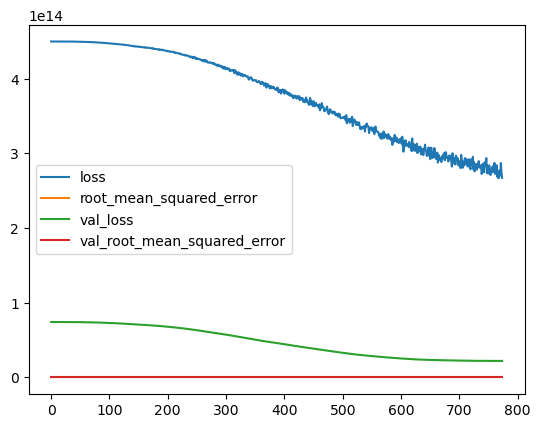

In [192]:
losses = pd.DataFrame(seqModel.history)
losses.plot();

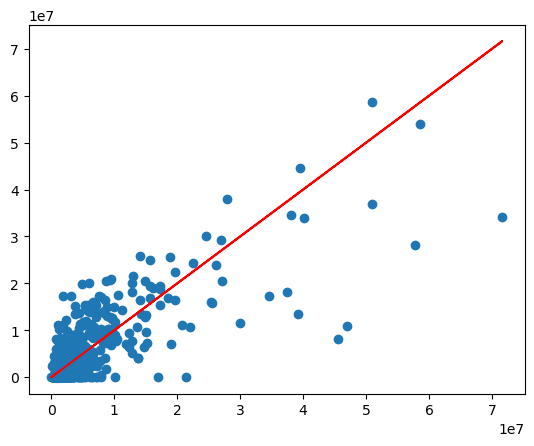

In [193]:
# Nos prédictions
plt.scatter(y_test,predictions)

# Prédictions parfaites
plt.plot(y_test,y_test,'r');

In [ ]:
plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

<font color='red'>6. kernel_ridge </font>

In [196]:
from sklearn import kernel_ridge

###### random forest inner loop
kernel_ridge_grid = GridSearchCV(kernel_ridge.KernelRidge(), 
                                 param_grid={'alpha':[0.1,0.2,0.5,1,2,3,4], # valeur par défaut 
                                             'kernel':['rbf','polynomial','linear'], # noyau Gaussien
                                             'degree':[1,2,3],
                                             'gamma':[0.01,0.2,0.5,1,3,5],
                                            },
                                )

# random forest outer loop
do_cross_validation_upgrade(kernel_ridge_grid,X_train_encod_scaled2,y_train, print_model=True)

GridSearchCV(estimator=KernelRidge(),
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 2, 3, 4],
                         'degree': [1, 2, 3],
                         'gamma': [0.01, 0.2, 0.5, 1, 3, 5],
                         'kernel': ['rbf', 'polynomial', 'linear']}):
	Cross-validated rmse: (-47378591755517.70 + -180782587083105.69 + -272600738917444.03) / 3 = -166920639252022.47



GridSearchCV(estimator=KernelRidge(),
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 2, 3, 4],
                         'degree': [1, 2, 3],
                         'gamma': [0.01, 0.2, 0.5, 1, 3, 5],
                         'kernel': ['rbf', 'polynomial', 'linear']}):
	Cross-validated rmse: (0.56 + 0.66 + 0.56) / 3 = 0.59



## Bagging Estimator

In [ ]:
###################  Classification  ###################
from sklearn.ensemble import BaggingClassifier 
baggingC = BaggingClassifier(n_estimators=100,
                             oob_score=True, 
                             # plus lg mais fourni une évaluation du modèle sur les 33% d'obs non use pour l'entrainement de chaq arbre
                             bootstrap=True # Méthode Bagging BIais plus élevé mais fournis meilleurs modèles
                             #bootstrap=False # Méthode Pasting Biais moins élevé mais prédicateurs plus corrélés
                            )
#pasting = tirage aléatoire sans remise

baggingC.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = baggingC.predict(X_test_std)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_, y_test_pred, pos_label=2)


print("accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("recall: {:.2f}".format(metrics.recall_score(y_test, y_pred) ))
print("precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("AUC: {:.2f}".format(metrics.auc(fpr, tpr)))

###################  Regrression  ###################
from sklearn.ensemble import BaggingRegressor
baggingR = BaggingRegressor(n_estimators=100)
baggingR.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = baggingR.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))

## RandomForest

In [ ]:
###################  Classification  ###################
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=100,
                                  oob_score=True,
                                  # plus lg mais fourni une évaluation du modèle sur les 33% d'obs non use pour l'entrainement de chaq arbre
                                  criterion ='gini', #{'gini', 'entropy', 'log_loss'}, default='gini'
                                  max_features='sqrt' #{“sqrt”, “log2”, None}, int or float, default=”sqrt”
                                  bootstrap=True # Méthode Bagging BIais plus élevé mais fournis meilleurs modèles
                                  #bootstrap=False # Méthode Pasting Biais moins élevé mais prédicateurs plus corrélés
                             
                            )
#pasting = tirage aléatoire sans remise

rfc.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = rfc.predict(X_test_std)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_, y_test_pred, pos_label=2)


print("accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("recall: {:.2f}".format(metrics.recall_score(y_test, y_pred) ))
print("precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("AUC: {:.2f}".format(metrics.auc(fpr, tpr)))

###################  Regrression  ###################
from sklearn.ensemble import RandomForestRegressor
p = X_train.shape[1]#nombre de variable
rfr = RandomForestRegressor(n_estimators=100,
                           max_features=p/3 #{“sqrt”, “log2”, None}, int or float, default=”sqrt”
                           )
rfr.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = rfr.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))

                            
###################  Feature Importance  ###################
# cf https://mljar.com/blog/feature-importance-in-random-forest/
import time
import numpy as np

start_time = time.time()
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
                            
###################  Feature Selection  ################### 
#En utilisant  SelectFromModel  avec un seuil d'importance choisi à l'aide de l'argument  threshold  , 
#on peut créer une sélection des features qui sont les plus importantes à la création d'un modèle.
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(rfr, prefit=True, threshold=0.003)
X_train2 = select.transform(X_train)
print(X_train2.shape)

## Adaboost

In [ ]:
###################  Classification  ###################
from sklearn.ensemble import AdaBoostClassifier 
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier ,
                             max_depth=1, *,
                             n_estimators=50, #si clf surajuste le train set reduire n_estimators ou regularisé pls fortemt
                             learning_rate=1.0, 
                             algorithm='SAMME.R',
                             # If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. 
                             # base_estimator must support calculation of class probabilities. 
                             # If ‘SAMME’ then use the SAMME discrete boosting algorithm. 
                             # The SAMME.R algorithm typically converges faster than SAMME, 
                             # achieving a lower test error with fewer boosting iterations.
                             
                             random_state=None
                        )
ada_clf.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = ada_clf.predict(X_test_std) #ada_clf.predict_proba(X_test_std) dépends de base_estimator

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_, y_test_pred, pos_label=2)


print("accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("recall: {:.2f}".format(metrics.recall_score(y_test, y_pred) ))
print("precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("AUC: {:.2f}".format(metrics.auc(fpr, tpr)))

###################  Regrression  ###################
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=100,
                            base_estimator=DecisionTreeRegressor,
                            max_depth=3, *,
                            n_estimators=50, #si clf surajuste le train set reduire n_estimators ou regularisé pls fortemt
                            learning_rate=1.0, 
                            loss = 'linear',#{‘linear’, ‘square’, ‘exponential’}, default='linear'’
                             random_state=None
                           )
ada_reg.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = ada_reg.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))

                            
###################  Feature Importance  ###################
from sklearn.inspection import permutation_importance
import time
import numpy as np

start_time = time.time()
perm_importance = permutation_importance(ada_clf, X_test, y_test_pred)
sorted_idx = perm_importance.importances_mean.argsort()
elapsed_time = time.time() - start_time
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
                            
###################  Feature Selection  ################### 
#En utilisant  SelectFromModel  avec un seuil d'importance choisi à l'aide de l'argument  threshold  , 
#on peut créer une sélection des features qui sont les plus importantes à la création d'un modèle.
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(ada_clf, prefit=True, threshold=0.003)
X_train2 = select.transform(X_train)
print(X_train2.shape)

## Gradient Boosting

In [ ]:
###################  Classification  ###################
from sklearn.ensemble import GradientBoostingClassifier 
gb_clf = GradientBoostingClassifier(base_estimator=DecisionTreeClassifier ,
                             max_depth=1, *,
                             n_estimators=100, #si clf surajuste le train set reduire n_estimators ou regularisé pls fortemt
                             learning_rate=0.1, 
                             subsample=1.0, # La fraction d'échantillons à utiliser pour ajuster les apprenants de base individuels 
                                            #  si <1 Stochastic Gradient Boosting
                             loss = 'log_loss',#‘log_loss’, ‘deviance’, ‘exponential’,default = 'log_loss'
                             max_depth=3,
                             verbose =1
                             
                        )
gb_clf.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = gb_clf.predict(X_test_std) #ada_clf.predict_proba(X_test_std) dépends de base_estimator

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_, y_test_pred, pos_label=2)


print("accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("recall: {:.2f}".format(metrics.recall_score(y_test, y_pred) ))
print("precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("AUC: {:.2f}".format(metrics.auc(fpr, tpr)))

###################  Regrression  ###################
from sklearn.ensemble import GradientBoostingRegressor
p = X_train.shape[1]#nombre de variable
gb_reg = GradientBoostingRegressor(n_estimators=100,
                            subsample=1.0, # La fraction d'échantillons à utiliser pour ajuster les apprenants de base individuels 
                                        #  si <1 Stochastic Gradient Boosting
                            max_depth=3, *,
                            n_estimators=50, #si clf surajuste le train set reduire n_estimators ou regularisé pls fortemt
                            learning_rate=0.1, # limite la contribution de chq arbre. si lr faible il faudra plus d'arbre. 
                                    # souvent entre [0.03,0.2]
                            loss = 'squared_error',#{‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}, default='squared_error'
                            # Ce sera la présence des outliers qui va conditionner le choix de la loss
                            # 'huber' est moins sensible aux outliers, 
                            # car elle est quadratiq pr les petites erreurs et linéaire pr les gdes
                            verbose =1
                           )
gb_reg.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = gb_reg.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))

#################  Nombre d'Arbres Optimal  ################
from sklearn.metrics import mean_squared_error

y_test_pred = gb_reg.predict(X_val_std)
errors = [mean_squared_error(y_val, y_val_pred) for y_val_pred in gb_reg.staged_predict(X_val_std)]  

best_n_estimators = np.armin(errors)
# Une solution avec la validation croisée fournira un résultat non biaisé contrairement à celle ci
    
###################  Feature Importance  ###################
import time
import numpy as np

start_time = time.time()
importances = gb_reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in gb_reg.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
                            
###################  Feature Selection  ################### 
#En utilisant  SelectFromModel  avec un seuil d'importance choisi à l'aide de l'argument  threshold  , 
#on peut créer une sélection des features qui sont les plus importantes à la création d'un modèle.
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(gb_reg, prefit=True, threshold=0.003)
X_train2 = select.transform(X_train)
print(X_train2.shape)

## XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Vous allez maintenant convertir le dataset en une structure de données optimisée appelée Dmatrix que XGBoost prend en charge 
# et lui confère des performances et des gains d'efficacité reconnus. 
data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

# Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

#                                 k-fold Cross Validation using XGBoost
# XGBoost supports k-fold cross validation via the cv() method. 
#All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build.

# num_boost_round: denotes the number of trees you build (analogous to n_estimators)
# metrics: tells the evaluation metrics to be watched during CV
# as_pandas: to return the results in a pandas DataFrame.
# early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve 
#                        for a given number of rounds.
# seed: for reproducibility of results.


# This time you will create a hyper-parameter dictionary params which holds all the hyper-parameters and 
# their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary 
# because you will use num_boost_rounds instead.

# You will use these parameters to build a 3-fold cross validation model by invoking XGBoost's cv() method 
# and store the results in a cv_results DataFrame. 
# Note that here you are using the Dmatrix object you created before.
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stoppi

In [ ]:
# You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. 
# XGBoost has a plot_tree() function that makes this type of visualization easy. 
# Once you train a model using the XGBoost learning API, 
# you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [ ]:
##### plot_importance
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## Modele Regression Ridge à Noyau

In [ ]:
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))


## Logistic regression using ANOVA kernel

### Option 1: Cholesky

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import check_pairwise_arrays

def anova_kernel(X, Y=None, gamma=None, p=1):
    X, Y = check_pairwise_arrays(X, Y)
    if gamma is None:
        gamma = 1. / X.shape[1]

    diff = X[:, None, :] - Y[None, :, :]
    diff **= 2
    diff *= -gamma
    np.exp(diff, out=diff)
    K = diff.sum(axis=2)
    K **= p
    return K


from scipy.linalg import cholesky
from sklearn.linear_model import LogisticRegression

# make X the matrix of all data points, train + test
# train is indices of train points, test of test
K = anova_kernel(X)
R = cholesky(K, lower=False)
clf = LogisticRegression()
clf.fit(R[train], y_train)
preds = clf.predict(R[test])

### Option 2: Nyström

In [ ]:
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

K_train = anova_kernel(X_train)
clf = Pipeline([
    ('nys', Nystroem(kernel='precomputed', n_components=100)),
    ('lr', LogisticRegression())
])
clf.fit(K_train, y_train)

K_test = anova_kernel(X_test, X_train)
preds = clf.predict(K_test)

# Estimateur à vote majoritaire

In [ ]:
###################  Classification  ###################

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rfc_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rfc_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)

# Let’s look at each classifier’s accuracy on the test set:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rfc_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
####################  Regression  ####################

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

lin_reg = LinearRegression()
rf_reg = RandomForestRegressor()
svm_reg = SVR()
knn_reg = KNeighborsRegressor()

voting_reg = VotingRegressor(
    estimators=[('lr', lin_reg), ('rf', rf_reg), ('svr', svm_reg), ('knn',knn_reg)]
)

voting_reg.fit(X_train, y_train)

# Let’s look at each classifier’s accuracy on the test set:
from sklearn.metrics import accuracy_score
for reg in (lin_reg, rf_reg,svm_reg,knn_reg):
    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    print(reg.__class__.__name__, np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

## DeepLearning

In [ ]:
# https://keras.io/guides/sequential_model/

### ANN

Gridsearch keras

In [ ]:
# Use scikit-learn to grid search the dropout rate
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from scikeras.wrappers import KerasClassifier,

# Function to create model, required for KerasClassifier
def create_model(dropout_rate, weight_constraint):
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), kernel_initializer='uniform', activation='linear', kernel_constraint=MaxNorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
#param_grid = dict(model__dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Simple way

In [ ]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
#Nous allons créer notre premier réseau de neurones. 

def initialize_model():
    
    #Nous utilisons la fonction Sequential() qui est approprié pour notre problème. Nous ne développerons pas ici mais
    #vous pouvez vous référer à la documentation de la bibliothèque Keras: https://keras.io/guides/sequential_model/
    model = models.Sequential()
    #On indique à notre modèle la dimension des données d'entrées qui correspond au nombre de colonnes de X_train
    model.add(keras.Input(shape=(140))) 
    #On met la première couche de notre réseau de neurones. Nous avons une couche avec 140 perceptrons car nous avons
    #140 colonnes dans nos données d'entrée comme dit plus haut. La fonction sigmoid est particulièrement indiqué
    #pour les problèmes de classification. Nous vous encourageons à aller voir à quoi elle ressemble. 
    model.add(layers.Dense(140, input_dim=2, activation='sigmoid'))
    #Nous ajoutons une seconde couche car nous sommes dans un problème non linéaire comme dit dans le cours
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #Ici, nous pouvons ajouter des paramètres à notre modèle. Il faut juste retenir que "accuracy" permet d'avoir
    #la précision de notre modèle et est particulièrement indiqué pour les problèmes de classification. 
    model.compile(metrics=['accuracy'],
                  loss='binary_crossentropy',
                  optimizer='adam')
    
    return model

model = initialize_model()

In [ ]:
#"summary" appliqué à notre modèle nous permet d'avoir les paramètres qui la compose ainsi que les dimensions de
#notre échantillon à la sortie de chaque couche

model.summary()

In [ ]:
#model = initialize_model()
history = model.fit(X_train, 
                    y_train, 
                    epochs = 50,
                    batch_size = 4,
                    verbose = 1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#On peut évaluer notre modèle
result = model.evaluate(X_test, y_test, verbose=1)

# On peut extraire la "metrics" choisie
accuracy = result[1]

print(f"La précision de notre modèle est de {round(accuracy*100,2)} %")

</br>

In [10]:
sk.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

</br>

</br>